[0.3233385  0.00682933 0.4492435  0.70598556 0.62242352 0.17296196
 0.33121464 0.87583211 0.15877669 0.32503929 0.73322268 0.99818761
 0.63873091 0.23157315 0.71428525 0.60558879 0.3407924  0.21863258
 0.87818824 0.03699053]
[0.8305088  0.80557239 0.7194476  0.95562531 0.8437994  0.91941712
 0.49916635 0.32454867 0.20866915 0.20841645 0.07204757 0.83725454
 0.43555233 0.2911815  0.26925324 0.91338588 0.30688103 0.77054862
 0.49790408 0.26421196]


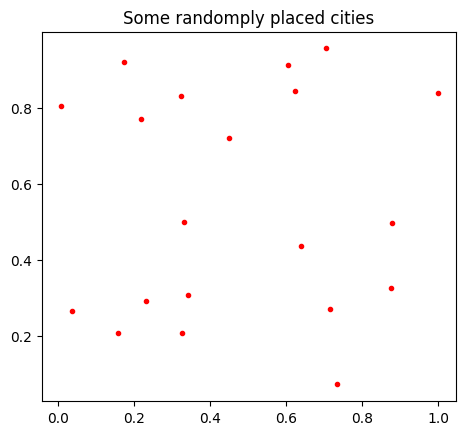

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import system
import math

N = 20  # number of cities

keep_frac = 0.5

x = np.random.rand(N)
y = np.random.rand(N)

print(x)
print(y)

plt.figure()

plt.plot(x,y,'.r')
plt.axis("scaled")
plt.title("Some randomply placed cities")
plt.show()

def pause():
    programPause = input("Press the <ENTER> key to continue...")

In [2]:
def initialize_population(size, N):
    Population = []
    
    ind = list(range(N))
    for i in range(size):
        # random permutation
        Q = np.random.permutation(ind).astype(int).tolist()
        if Q not in Population:
            Population.append(Q)
    return Population
Population = initialize_population(20,N)




print(Population[0:3])

[[6, 17, 19, 7, 4, 5, 8, 16, 12, 0, 13, 2, 10, 1, 9, 11, 3, 18, 15, 14], [7, 13, 11, 15, 1, 18, 10, 2, 6, 12, 9, 14, 17, 8, 16, 19, 3, 4, 0, 5], [12, 11, 18, 6, 15, 1, 16, 8, 2, 3, 9, 17, 14, 4, 7, 19, 13, 5, 10, 0]]


In [3]:
def crossover(x,y):
    x = np.copy(x)
    y = np.copy(y)
    n = len(x)
    i = np.random.randint(n)
    found = 1
    pos = i
    while found:
        x[pos], y[pos] = y[pos], x[pos]
        
        val = x[pos] # value to be searched in x

        q = np.where(x==val)
        q = q[0]
        #print(q," ",pos)

        if len(q)>1:
            found = 1
            if q[0]==pos:
                pos = q[1]
            else:
                pos = q[0]
        else:
            found = 0
        #print("Step")
        #print(x)
        #print(y)
        #print(pos)
        #pause()
                

        
    return x.tolist(),y.tolist() 





In [4]:
def mutate(x,mutation_rate=0.9):
    x = np.copy(x)
    if np.random.rand()<mutation_rate:
        n = len(x)
        i = np.random.randint(n)
        j = np.random.randint(n)
        while i==j:
            j = np.random.randint(n)
        x[i],x[j] = x[j],x[i]
        return x.tolist()
    else:
        return x.tolist()
print(mutate(Population[3]))

[7, 17, 15, 14, 0, 4, 12, 1, 6, 8, 19, 3, 10, 13, 2, 9, 11, 16, 5, 18]


In [5]:
# Compute cost matrix

A = np.zeros((N,N))
print(A)

for i in range(0,N):
    for j in range(0,i):
        A[i,j] = np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)
        A[j,i] = A[i,j]

print(A)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [6]:
def fitness(circuit):
    n = len(circuit)
    S = 0
    for i in range(0,n-1):
        S += A[circuit[i],circuit[i+1]]
    # closing the loop
    S+= A[circuit[-1],circuit[0]]

    return S

# compute costs for population
def func(Pop):
    SS = np.zeros(len(Pop))
    for i in range(0,len(Pop)):
        SS[i] = fitness(Pop[i])
    return SS

func(Population)

array([11.21982595, 10.30091264, 11.62189171, 11.66638718, 11.76732449,
       10.49909552, 11.71533538, 10.89168193, 10.63143796, 11.81384503,
       11.33935765, 11.4490915 , 10.96112209, 10.36422445, 10.13796946,
       10.95869951, 10.91402483, 10.01026011, 10.57713971, 12.54289431])

20
500
Generation  0  | Best variable =  [19, 16, 6, 5, 9, 1, 3, 2, 17, 0, 15, 4, 11, 7, 8, 13, 12, 14, 10, 18]  nb Func Eval =  1000
Best cos  =  8.013642790434812
[19, 16, 6, 5, 9, 1, 3, 2, 17, 0, 15, 4, 11, 7, 8, 13, 12, 14, 10, 18, 19]


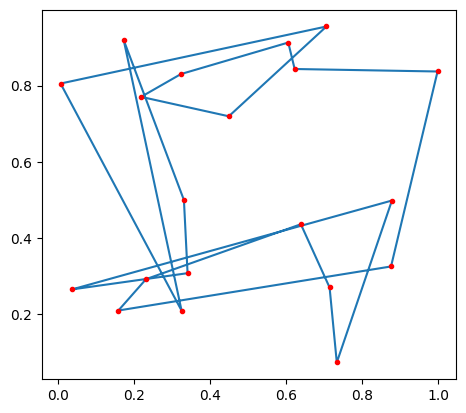

Generation  1  | Best variable =  [9, 19, 12, 7, 10, 16, 18, 11, 3, 15, 4, 6, 8, 1, 14, 0, 2, 17, 5, 13]  nb Func Eval =  2000
Best cos  =  7.646572423864934
[9, 19, 12, 7, 10, 16, 18, 11, 3, 15, 4, 6, 8, 1, 14, 0, 2, 17, 5, 13, 9]


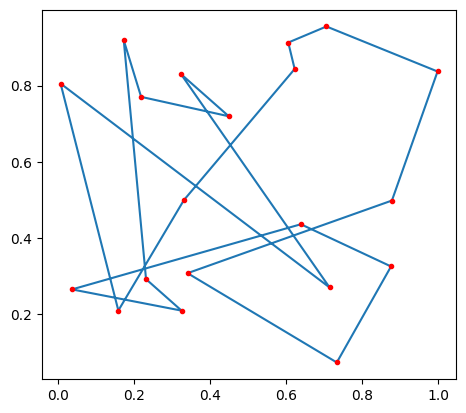

Generation  2  | Best variable =  [9, 19, 12, 7, 10, 16, 18, 11, 3, 15, 4, 6, 8, 1, 14, 0, 2, 17, 5, 13]  nb Func Eval =  3000
Best cos  =  7.646572423864934
[9, 19, 12, 7, 10, 16, 18, 11, 3, 15, 4, 6, 8, 1, 14, 0, 2, 17, 5, 13, 9]


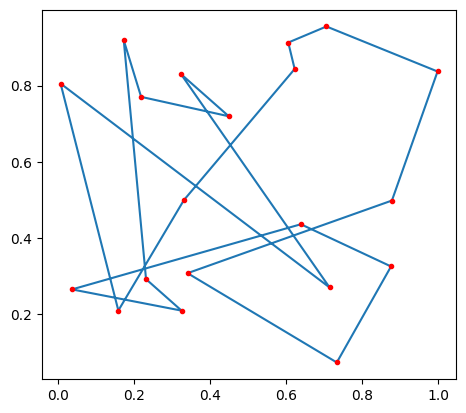

Generation  3  | Best variable =  [0, 15, 3, 4, 16, 6, 5, 19, 8, 13, 9, 1, 17, 2, 18, 7, 10, 12, 11, 14]  nb Func Eval =  4000
Best cos  =  7.135765356288442
[0, 15, 3, 4, 16, 6, 5, 19, 8, 13, 9, 1, 17, 2, 18, 7, 10, 12, 11, 14, 0]


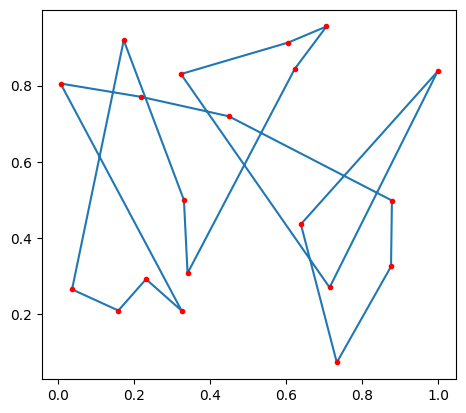

Generation  4  | Best variable =  [0, 15, 3, 4, 16, 6, 5, 19, 8, 13, 9, 1, 17, 2, 18, 7, 10, 12, 11, 14]  nb Func Eval =  5000
Best cos  =  7.135765356288442
[0, 15, 3, 4, 16, 6, 5, 19, 8, 13, 9, 1, 17, 2, 18, 7, 10, 12, 11, 14, 0]


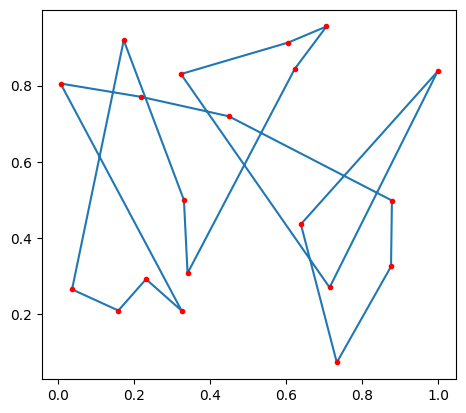

Generation  5  | Best variable =  [0, 15, 3, 4, 16, 6, 5, 19, 8, 13, 9, 1, 17, 2, 18, 7, 10, 12, 11, 14]  nb Func Eval =  6000
Best cos  =  7.135765356288442
[0, 15, 3, 4, 16, 6, 5, 19, 8, 13, 9, 1, 17, 2, 18, 7, 10, 12, 11, 14, 0]


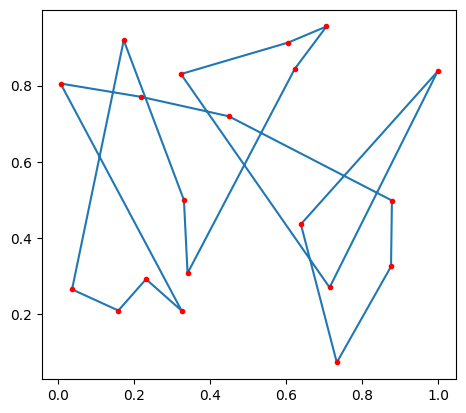

Generation  6  | Best variable =  [0, 15, 3, 4, 16, 6, 5, 19, 8, 13, 9, 1, 17, 2, 18, 7, 10, 12, 11, 14]  nb Func Eval =  7000
Best cos  =  7.135765356288442
[0, 15, 3, 4, 16, 6, 5, 19, 8, 13, 9, 1, 17, 2, 18, 7, 10, 12, 11, 14, 0]


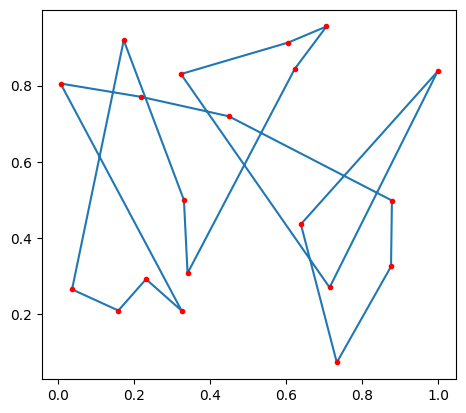

Generation  7  | Best variable =  [0, 15, 3, 4, 16, 6, 5, 19, 8, 13, 9, 1, 17, 2, 18, 7, 10, 12, 11, 14]  nb Func Eval =  8000
Best cos  =  7.135765356288442
[0, 15, 3, 4, 16, 6, 5, 19, 8, 13, 9, 1, 17, 2, 18, 7, 10, 12, 11, 14, 0]


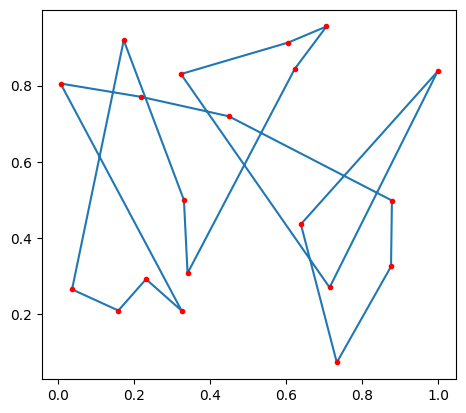

Generation  8  | Best variable =  [0, 15, 3, 4, 16, 6, 5, 19, 8, 13, 9, 1, 17, 2, 18, 7, 10, 12, 11, 14]  nb Func Eval =  9000
Best cos  =  7.135765356288442
[0, 15, 3, 4, 16, 6, 5, 19, 8, 13, 9, 1, 17, 2, 18, 7, 10, 12, 11, 14, 0]


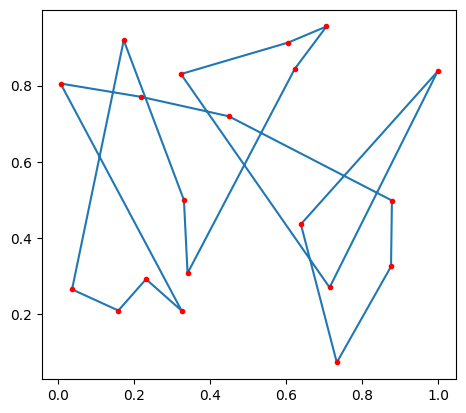

Generation  9  | Best variable =  [9, 16, 12, 3, 6, 1, 2, 5, 17, 0, 15, 4, 11, 7, 13, 19, 8, 14, 10, 18]  nb Func Eval =  10000
Best cos  =  7.128819387686432
[9, 16, 12, 3, 6, 1, 2, 5, 17, 0, 15, 4, 11, 7, 13, 19, 8, 14, 10, 18, 9]


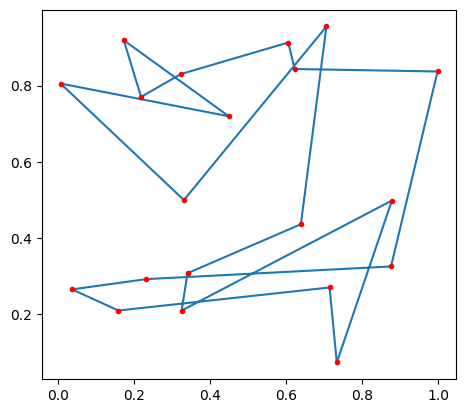

Generation  10  | Best variable =  [11, 15, 14, 7, 9, 19, 13, 8, 16, 5, 17, 0, 4, 2, 1, 6, 18, 10, 12, 3]  nb Func Eval =  11000
Best cos  =  7.126596499021012
[11, 15, 14, 7, 9, 19, 13, 8, 16, 5, 17, 0, 4, 2, 1, 6, 18, 10, 12, 3, 11]


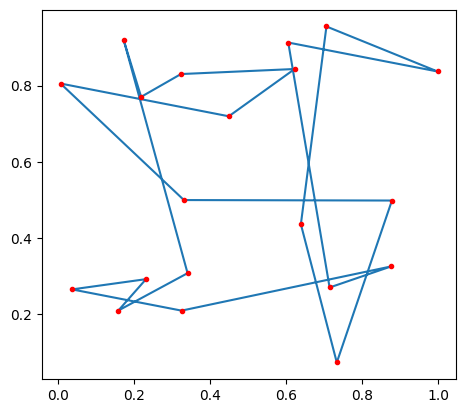

Generation  11  | Best variable =  [11, 15, 14, 7, 9, 19, 13, 8, 16, 5, 17, 0, 4, 2, 1, 6, 18, 10, 12, 3]  nb Func Eval =  12000
Best cos  =  7.126596499021012
[11, 15, 14, 7, 9, 19, 13, 8, 16, 5, 17, 0, 4, 2, 1, 6, 18, 10, 12, 3, 11]


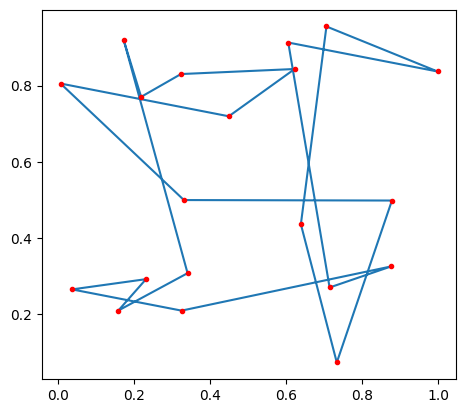

Generation  12  | Best variable =  [2, 15, 18, 7, 13, 19, 8, 9, 6, 16, 14, 10, 12, 1, 0, 17, 3, 11, 5, 4]  nb Func Eval =  13000
Best cos  =  6.998790743351252
[2, 15, 18, 7, 13, 19, 8, 9, 6, 16, 14, 10, 12, 1, 0, 17, 3, 11, 5, 4, 2]


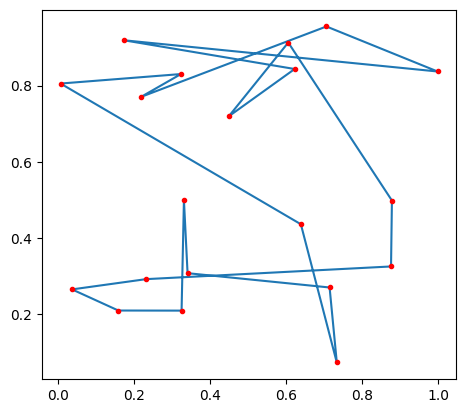

Generation  13  | Best variable =  [11, 18, 14, 8, 9, 19, 13, 5, 3, 0, 17, 15, 4, 2, 1, 6, 16, 10, 12, 7]  nb Func Eval =  14000
Best cos  =  6.9531872575079285
[11, 18, 14, 8, 9, 19, 13, 5, 3, 0, 17, 15, 4, 2, 1, 6, 16, 10, 12, 7, 11]


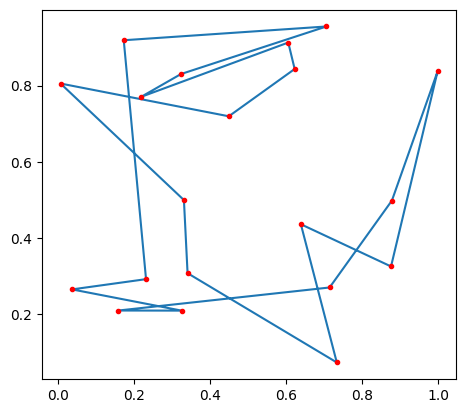

Generation  14  | Best variable =  [11, 18, 14, 8, 9, 19, 13, 5, 3, 0, 17, 15, 4, 2, 1, 6, 16, 10, 12, 7]  nb Func Eval =  15000
Best cos  =  6.9531872575079285
[11, 18, 14, 8, 9, 19, 13, 5, 3, 0, 17, 15, 4, 2, 1, 6, 16, 10, 12, 7, 11]


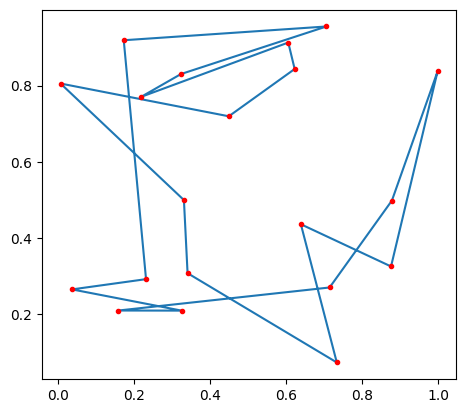

Generation  15  | Best variable =  [19, 16, 6, 15, 4, 0, 1, 5, 17, 3, 11, 10, 13, 2, 14, 18, 12, 7, 9, 8]  nb Func Eval =  16000
Best cos  =  6.891935649765053
[19, 16, 6, 15, 4, 0, 1, 5, 17, 3, 11, 10, 13, 2, 14, 18, 12, 7, 9, 8, 19]


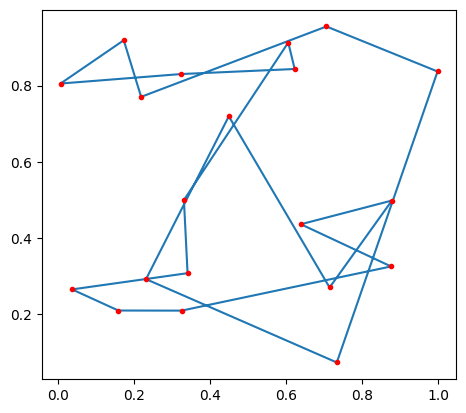

Generation  16  | Best variable =  [11, 14, 12, 7, 18, 10, 16, 6, 8, 19, 13, 2, 1, 0, 17, 9, 5, 15, 4, 3]  nb Func Eval =  17000
Best cos  =  6.648254863739649
[11, 14, 12, 7, 18, 10, 16, 6, 8, 19, 13, 2, 1, 0, 17, 9, 5, 15, 4, 3, 11]


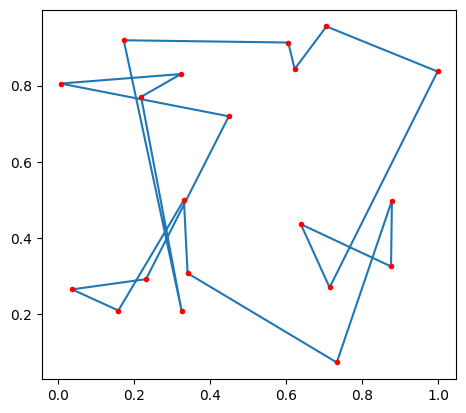

Generation  17  | Best variable =  [2, 15, 3, 7, 13, 19, 8, 9, 6, 16, 14, 10, 12, 1, 17, 5, 0, 11, 18, 4]  nb Func Eval =  18000
Best cos  =  6.541234200665672
[2, 15, 3, 7, 13, 19, 8, 9, 6, 16, 14, 10, 12, 1, 17, 5, 0, 11, 18, 4, 2]


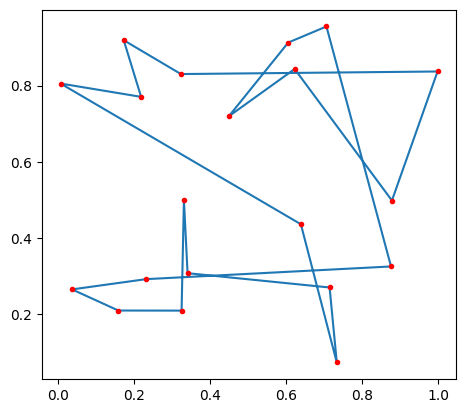

Generation  18  | Best variable =  [11, 13, 6, 16, 9, 19, 8, 5, 1, 0, 17, 15, 3, 4, 12, 2, 18, 14, 10, 7]  nb Func Eval =  19000
Best cos  =  6.431978285769063
[11, 13, 6, 16, 9, 19, 8, 5, 1, 0, 17, 15, 3, 4, 12, 2, 18, 14, 10, 7, 11]


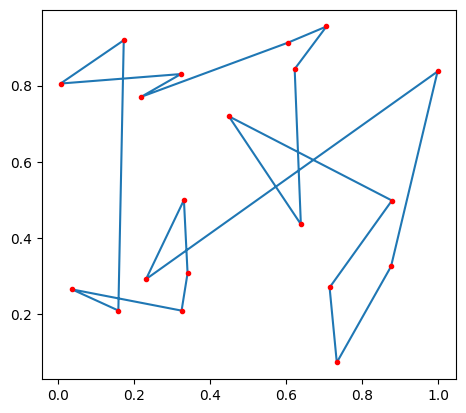

Generation  19  | Best variable =  [11, 13, 6, 16, 9, 19, 8, 5, 1, 0, 17, 15, 3, 4, 12, 2, 18, 14, 10, 7]  nb Func Eval =  20000
Best cos  =  6.431978285769063
[11, 13, 6, 16, 9, 19, 8, 5, 1, 0, 17, 15, 3, 4, 12, 2, 18, 14, 10, 7, 11]


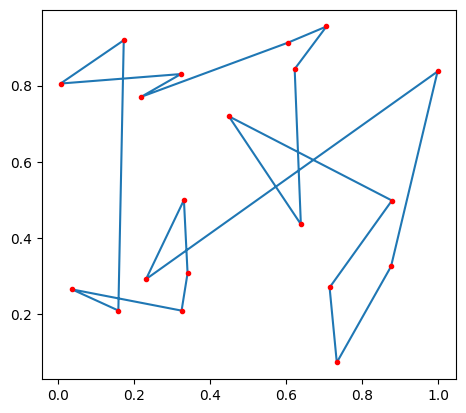

Generation  20  | Best variable =  [11, 13, 6, 16, 9, 19, 8, 5, 1, 0, 17, 15, 3, 4, 12, 2, 18, 14, 10, 7]  nb Func Eval =  21000
Best cos  =  6.431978285769063
[11, 13, 6, 16, 9, 19, 8, 5, 1, 0, 17, 15, 3, 4, 12, 2, 18, 14, 10, 7, 11]


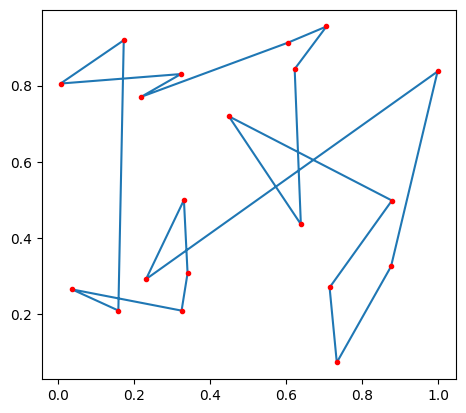

Generation  21  | Best variable =  [11, 13, 6, 16, 9, 19, 8, 5, 1, 0, 17, 15, 3, 4, 12, 2, 18, 14, 10, 7]  nb Func Eval =  22000
Best cos  =  6.431978285769063
[11, 13, 6, 16, 9, 19, 8, 5, 1, 0, 17, 15, 3, 4, 12, 2, 18, 14, 10, 7, 11]


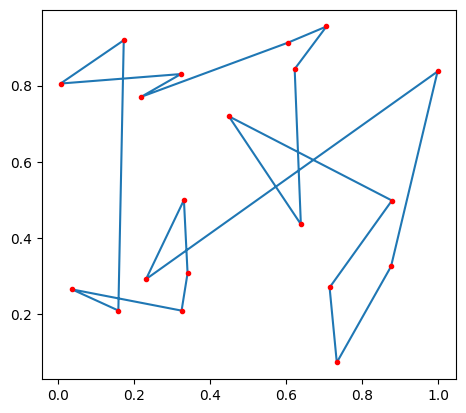

Generation  22  | Best variable =  [8, 16, 7, 10, 14, 2, 1, 5, 0, 17, 15, 11, 18, 4, 3, 12, 13, 6, 9, 19]  nb Func Eval =  23000
Best cos  =  6.347351931774007
[8, 16, 7, 10, 14, 2, 1, 5, 0, 17, 15, 11, 18, 4, 3, 12, 13, 6, 9, 19, 8]


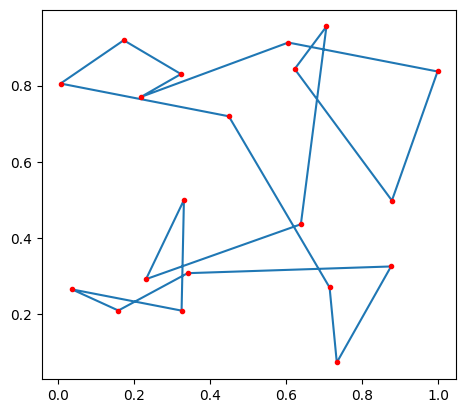

Generation  23  | Best variable =  [8, 16, 7, 10, 14, 2, 1, 5, 0, 17, 15, 11, 18, 4, 3, 12, 13, 6, 9, 19]  nb Func Eval =  24000
Best cos  =  6.347351931774007
[8, 16, 7, 10, 14, 2, 1, 5, 0, 17, 15, 11, 18, 4, 3, 12, 13, 6, 9, 19, 8]


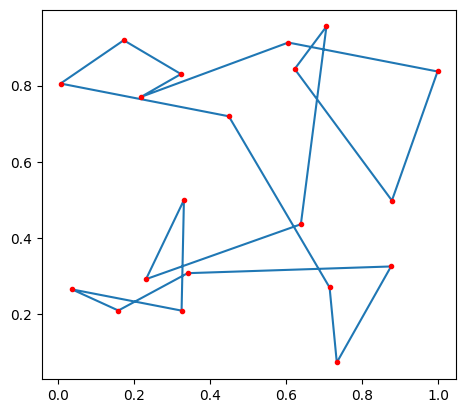

Generation  24  | Best variable =  [13, 6, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 1, 8, 19]  nb Func Eval =  25000
Best cos  =  6.316731668594878
[13, 6, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 1, 8, 19, 13]


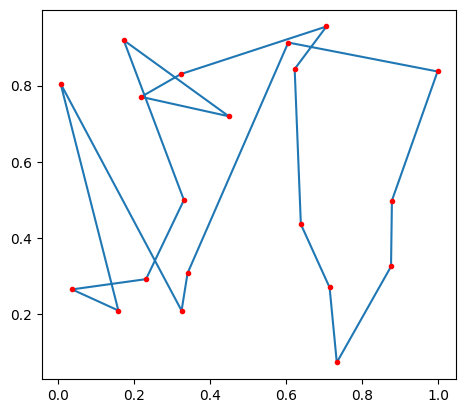

Generation  25  | Best variable =  [13, 6, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 1, 8, 19]  nb Func Eval =  26000
Best cos  =  6.316731668594878
[13, 6, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 1, 8, 19, 13]


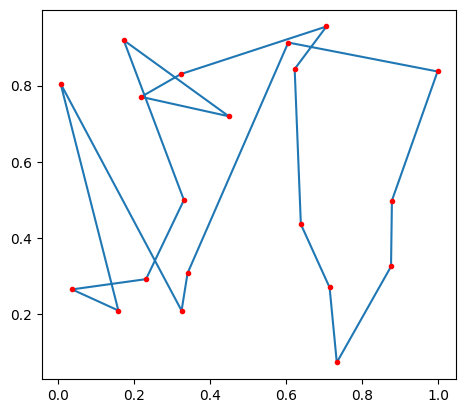

Generation  26  | Best variable =  [13, 6, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 1, 8, 19]  nb Func Eval =  27000
Best cos  =  6.316731668594878
[13, 6, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 1, 8, 19, 13]


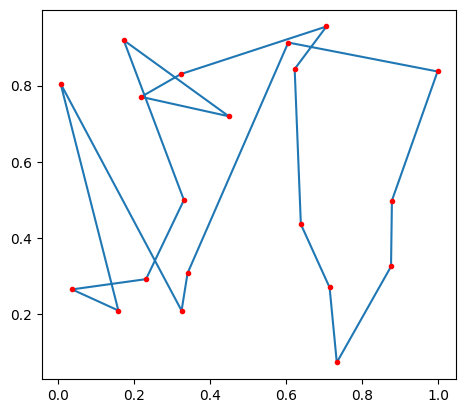

Generation  27  | Best variable =  [13, 6, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 1, 8, 19]  nb Func Eval =  28000
Best cos  =  6.316731668594878
[13, 6, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 1, 8, 19, 13]


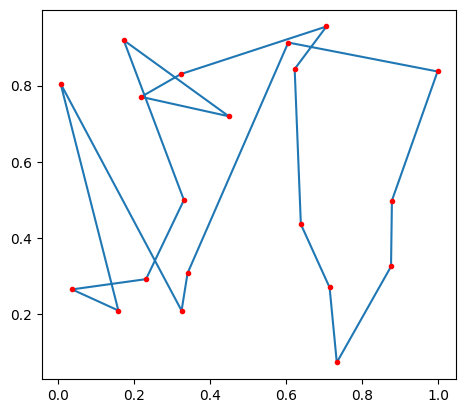

Generation  28  | Best variable =  [2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7]  nb Func Eval =  29000
Best cos  =  5.979618118633781
[2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7, 2]


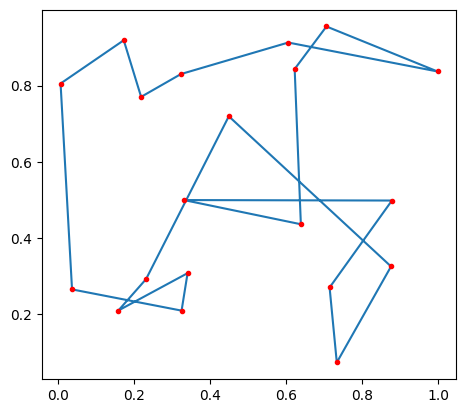

Generation  29  | Best variable =  [2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7]  nb Func Eval =  30000
Best cos  =  5.979618118633781
[2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7, 2]


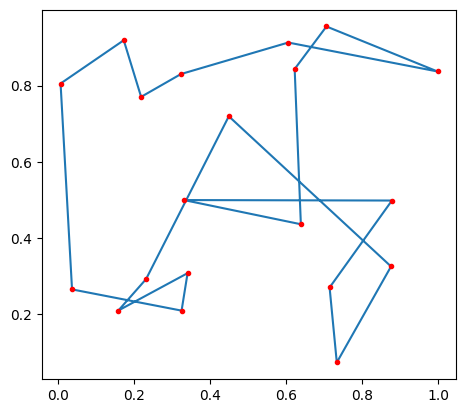

Generation  30  | Best variable =  [2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7]  nb Func Eval =  31000
Best cos  =  5.979618118633781
[2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7, 2]


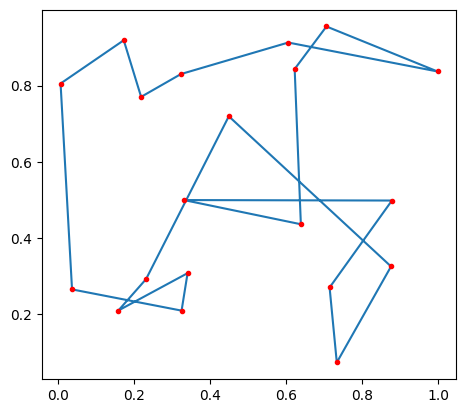

Generation  31  | Best variable =  [2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7]  nb Func Eval =  32000
Best cos  =  5.979618118633781
[2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7, 2]


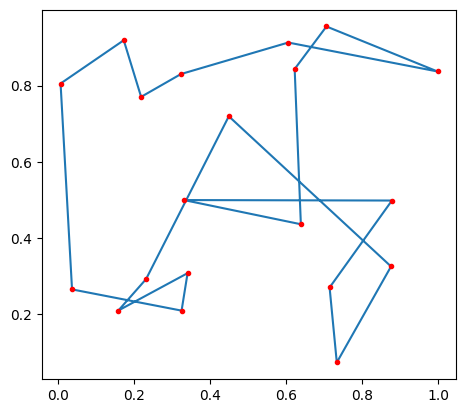

Generation  32  | Best variable =  [2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7]  nb Func Eval =  33000
Best cos  =  5.979618118633781
[2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7, 2]


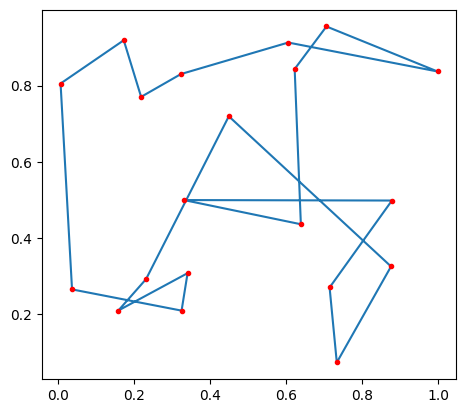

Generation  33  | Best variable =  [2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7]  nb Func Eval =  34000
Best cos  =  5.979618118633781
[2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7, 2]


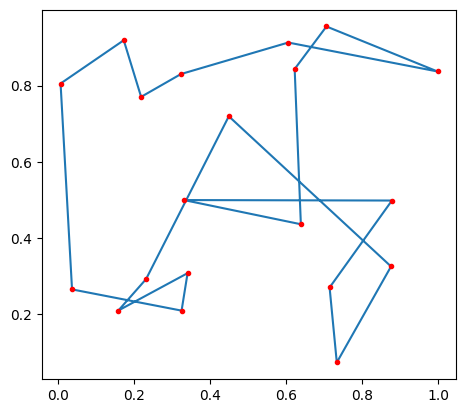

Generation  34  | Best variable =  [2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7]  nb Func Eval =  35000
Best cos  =  5.979618118633781
[2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7, 2]


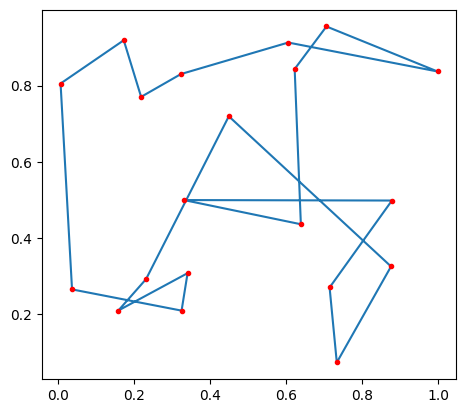

Generation  35  | Best variable =  [2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7]  nb Func Eval =  36000
Best cos  =  5.979618118633781
[2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7, 2]


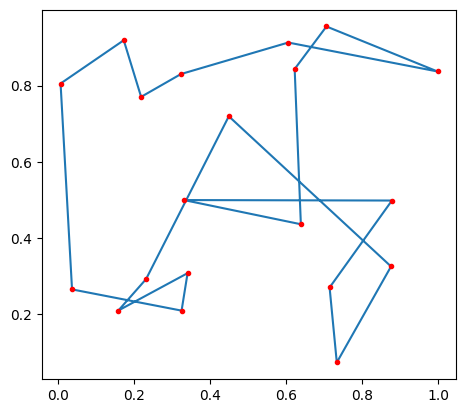

Generation  36  | Best variable =  [2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7]  nb Func Eval =  37000
Best cos  =  5.979618118633781
[2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7, 2]


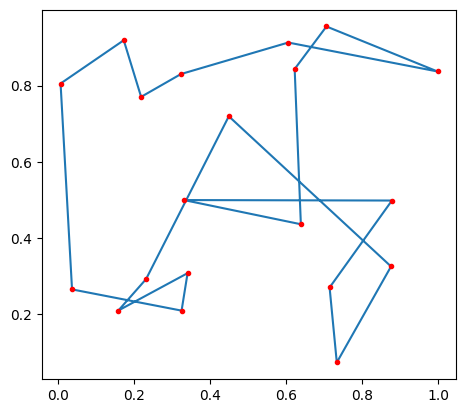

Generation  37  | Best variable =  [2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7]  nb Func Eval =  38000
Best cos  =  5.979618118633781
[2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7, 2]


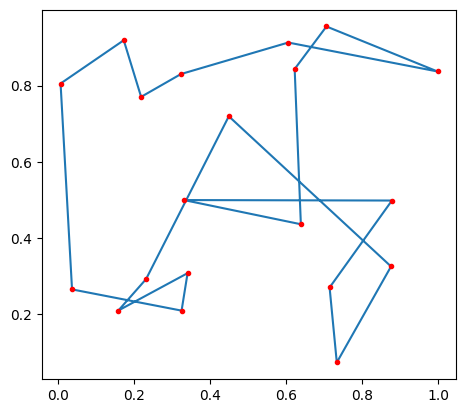

Generation  38  | Best variable =  [2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7]  nb Func Eval =  39000
Best cos  =  5.979618118633781
[2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 15, 11, 3, 4, 12, 6, 18, 14, 10, 7, 2]


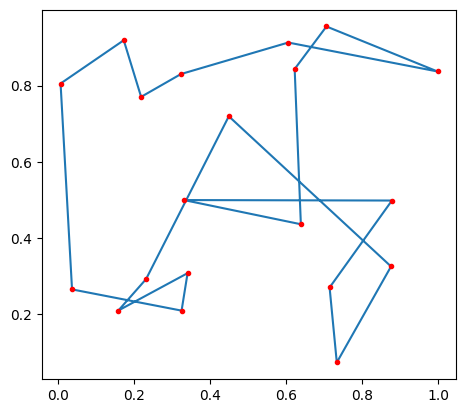

Generation  39  | Best variable =  [13, 1, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 6, 8, 19]  nb Func Eval =  40000
Best cos  =  5.7358416123939495
[13, 1, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 6, 8, 19, 13]


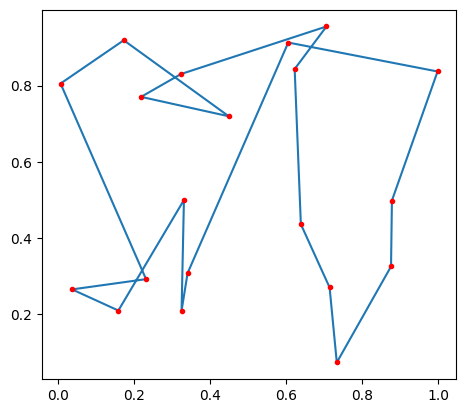

Generation  40  | Best variable =  [13, 1, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 6, 8, 19]  nb Func Eval =  41000
Best cos  =  5.7358416123939495
[13, 1, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 6, 8, 19, 13]


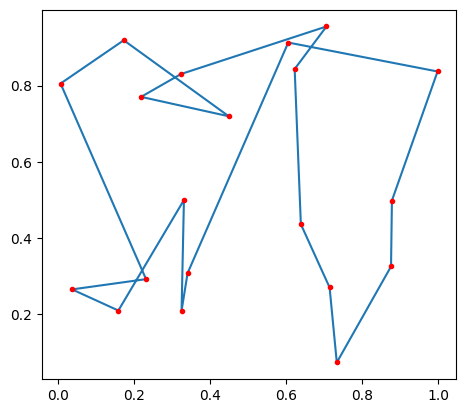

Generation  41  | Best variable =  [13, 1, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 6, 8, 19]  nb Func Eval =  42000
Best cos  =  5.7358416123939495
[13, 1, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 6, 8, 19, 13]


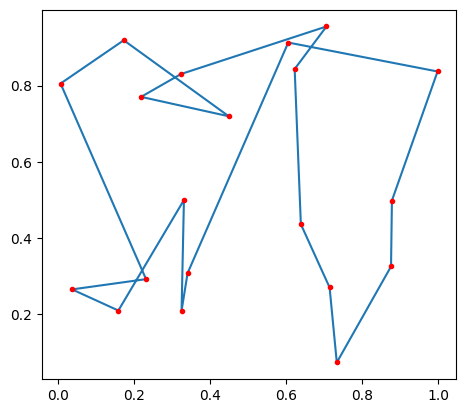

Generation  42  | Best variable =  [13, 1, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 6, 8, 19]  nb Func Eval =  43000
Best cos  =  5.7358416123939495
[13, 1, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 6, 8, 19, 13]


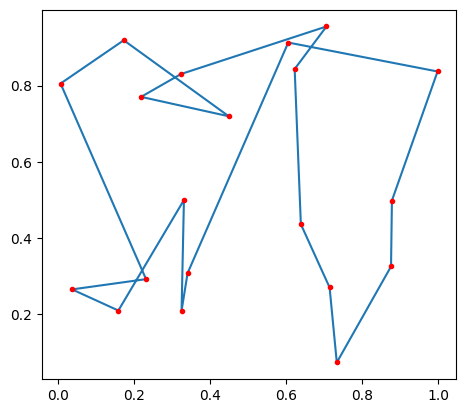

Generation  43  | Best variable =  [13, 1, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 6, 8, 19]  nb Func Eval =  44000
Best cos  =  5.7358416123939495
[13, 1, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 6, 8, 19, 13]


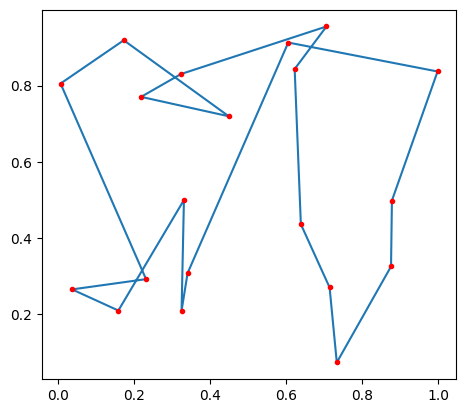

Generation  44  | Best variable =  [13, 1, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 6, 8, 19]  nb Func Eval =  45000
Best cos  =  5.7358416123939495
[13, 1, 5, 2, 17, 0, 3, 4, 12, 14, 10, 7, 18, 11, 15, 16, 9, 6, 8, 19, 13]


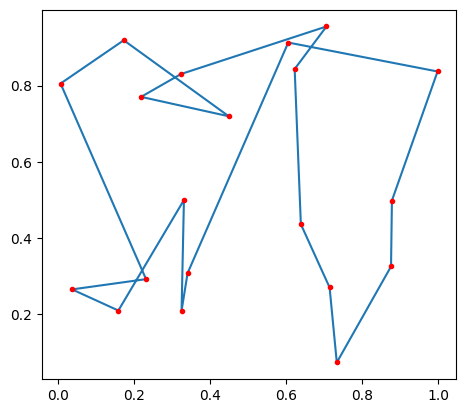

Generation  45  | Best variable =  [2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 3, 11, 15, 4, 12, 6, 14, 10, 7, 18]  nb Func Eval =  46000
Best cos  =  5.71333549604027
[2, 13, 8, 16, 9, 19, 1, 5, 17, 0, 3, 11, 15, 4, 12, 6, 14, 10, 7, 18, 2]


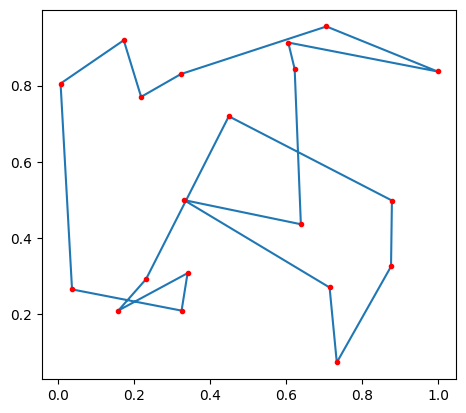

Generation  46  | Best variable =  [6, 16, 9, 8, 13, 19, 1, 5, 0, 17, 11, 2, 3, 15, 4, 18, 12, 14, 7, 10]  nb Func Eval =  47000
Best cos  =  5.5847139985869525
[6, 16, 9, 8, 13, 19, 1, 5, 0, 17, 11, 2, 3, 15, 4, 18, 12, 14, 7, 10, 6]


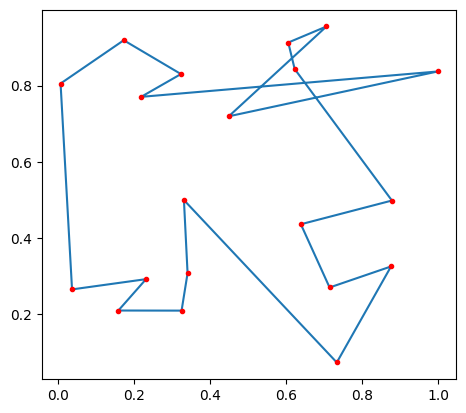

Generation  47  | Best variable =  [6, 16, 9, 8, 13, 19, 1, 5, 0, 17, 11, 2, 3, 15, 4, 18, 12, 14, 7, 10]  nb Func Eval =  48000
Best cos  =  5.5847139985869525
[6, 16, 9, 8, 13, 19, 1, 5, 0, 17, 11, 2, 3, 15, 4, 18, 12, 14, 7, 10, 6]


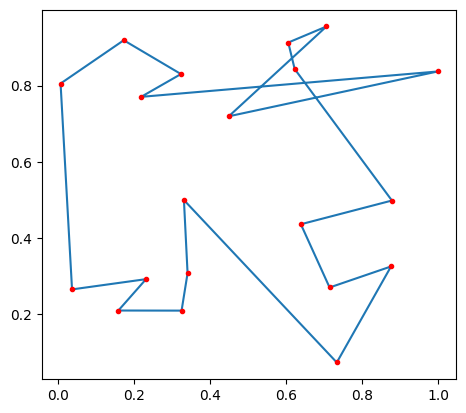

Generation  48  | Best variable =  [6, 16, 9, 8, 13, 19, 1, 5, 0, 17, 11, 2, 3, 15, 4, 18, 12, 14, 7, 10]  nb Func Eval =  49000
Best cos  =  5.5847139985869525
[6, 16, 9, 8, 13, 19, 1, 5, 0, 17, 11, 2, 3, 15, 4, 18, 12, 14, 7, 10, 6]


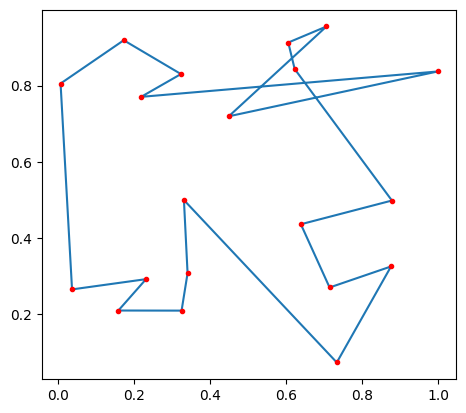

Generation  49  | Best variable =  [8, 16, 6, 13, 2, 5, 1, 17, 0, 4, 15, 3, 11, 18, 12, 7, 14, 9, 10, 19]  nb Func Eval =  50000
Best cos  =  5.503711214968462
[8, 16, 6, 13, 2, 5, 1, 17, 0, 4, 15, 3, 11, 18, 12, 7, 14, 9, 10, 19, 8]


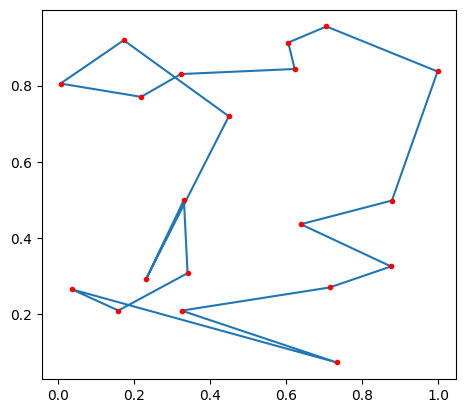

Generation  50  | Best variable =  [8, 16, 6, 13, 2, 5, 1, 17, 0, 4, 15, 3, 11, 18, 12, 7, 14, 9, 10, 19]  nb Func Eval =  51000
Best cos  =  5.503711214968462
[8, 16, 6, 13, 2, 5, 1, 17, 0, 4, 15, 3, 11, 18, 12, 7, 14, 9, 10, 19, 8]


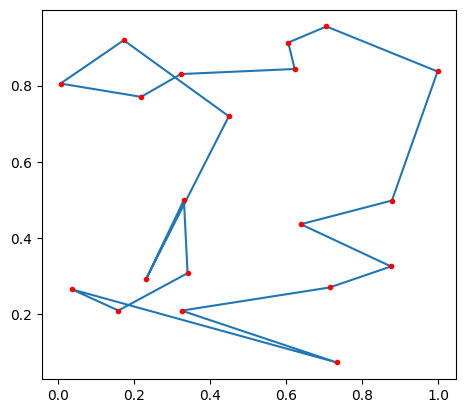

Generation  51  | Best variable =  [8, 16, 6, 13, 2, 5, 1, 17, 0, 4, 15, 3, 11, 18, 12, 7, 14, 9, 10, 19]  nb Func Eval =  52000
Best cos  =  5.503711214968462
[8, 16, 6, 13, 2, 5, 1, 17, 0, 4, 15, 3, 11, 18, 12, 7, 14, 9, 10, 19, 8]


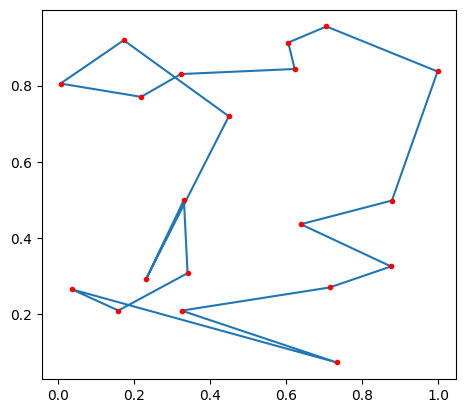

Generation  52  | Best variable =  [8, 16, 6, 13, 2, 5, 1, 17, 0, 4, 15, 3, 11, 18, 12, 7, 14, 9, 10, 19]  nb Func Eval =  53000
Best cos  =  5.503711214968462
[8, 16, 6, 13, 2, 5, 1, 17, 0, 4, 15, 3, 11, 18, 12, 7, 14, 9, 10, 19, 8]


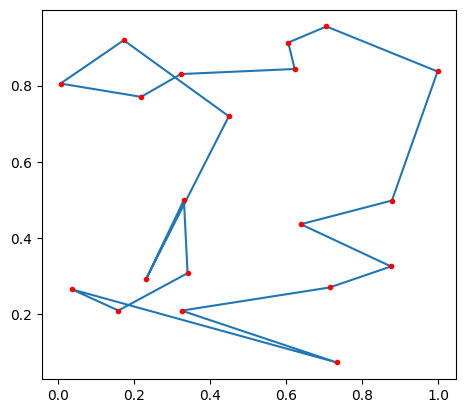

Generation  53  | Best variable =  [8, 16, 6, 13, 2, 5, 1, 17, 0, 4, 15, 3, 11, 18, 12, 7, 14, 9, 10, 19]  nb Func Eval =  54000
Best cos  =  5.503711214968462
[8, 16, 6, 13, 2, 5, 1, 17, 0, 4, 15, 3, 11, 18, 12, 7, 14, 9, 10, 19, 8]


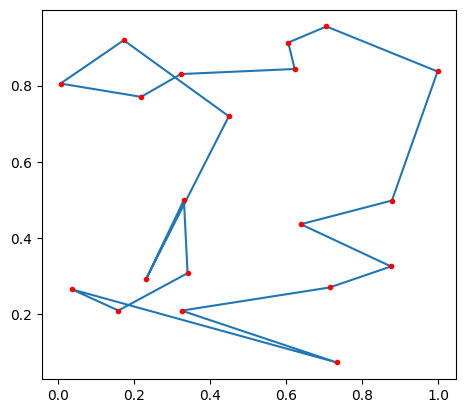

Generation  54  | Best variable =  [7, 10, 16, 8, 19, 13, 1, 5, 0, 2, 15, 11, 3, 4, 17, 6, 9, 14, 12, 18]  nb Func Eval =  55000
Best cos  =  5.486095171395158
[7, 10, 16, 8, 19, 13, 1, 5, 0, 2, 15, 11, 3, 4, 17, 6, 9, 14, 12, 18, 7]


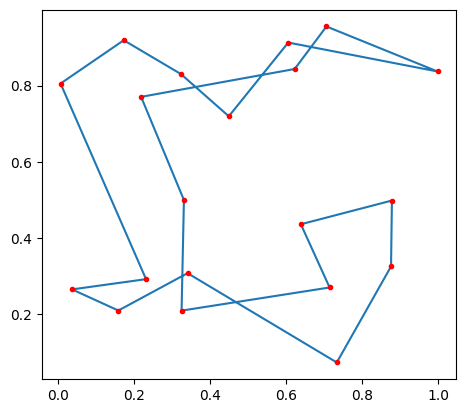

Generation  55  | Best variable =  [7, 10, 16, 8, 19, 13, 1, 5, 0, 2, 15, 11, 3, 4, 17, 6, 9, 14, 12, 18]  nb Func Eval =  56000
Best cos  =  5.486095171395158
[7, 10, 16, 8, 19, 13, 1, 5, 0, 2, 15, 11, 3, 4, 17, 6, 9, 14, 12, 18, 7]


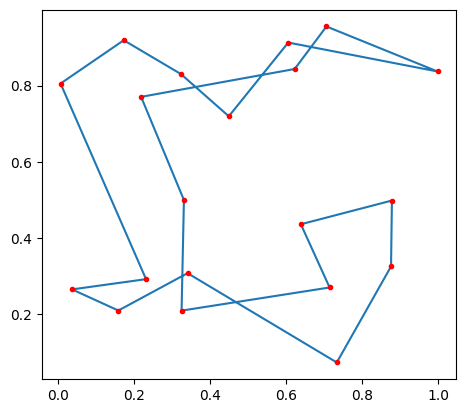

Generation  56  | Best variable =  [8, 16, 12, 6, 2, 5, 1, 17, 0, 4, 15, 3, 11, 18, 7, 14, 13, 9, 10, 19]  nb Func Eval =  57000
Best cos  =  5.36684280556255
[8, 16, 12, 6, 2, 5, 1, 17, 0, 4, 15, 3, 11, 18, 7, 14, 13, 9, 10, 19, 8]


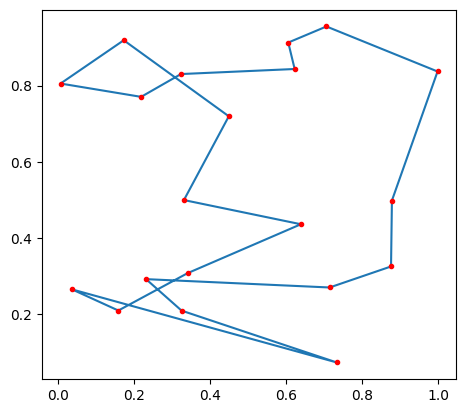

Generation  57  | Best variable =  [8, 16, 12, 6, 2, 5, 1, 17, 0, 4, 15, 3, 11, 18, 7, 14, 13, 9, 10, 19]  nb Func Eval =  58000
Best cos  =  5.36684280556255
[8, 16, 12, 6, 2, 5, 1, 17, 0, 4, 15, 3, 11, 18, 7, 14, 13, 9, 10, 19, 8]


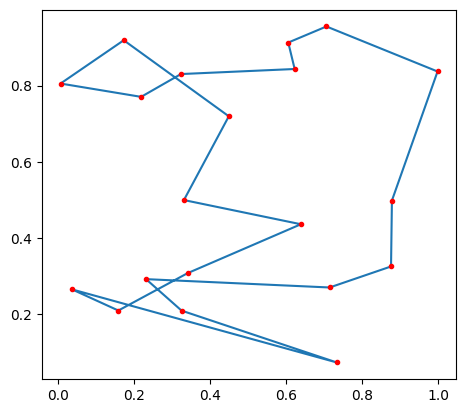

Generation  58  | Best variable =  [13, 8, 19, 16, 9, 6, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 12, 14, 10, 7]  nb Func Eval =  59000
Best cos  =  4.9052758910862755
[13, 8, 19, 16, 9, 6, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 12, 14, 10, 7, 13]


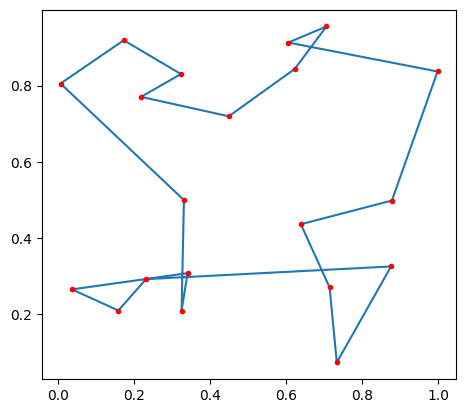

Generation  59  | Best variable =  [9, 8, 19, 16, 13, 6, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 12, 14, 10, 7]  nb Func Eval =  60000
Best cos  =  4.829715077492085
[9, 8, 19, 16, 13, 6, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 12, 14, 10, 7, 9]


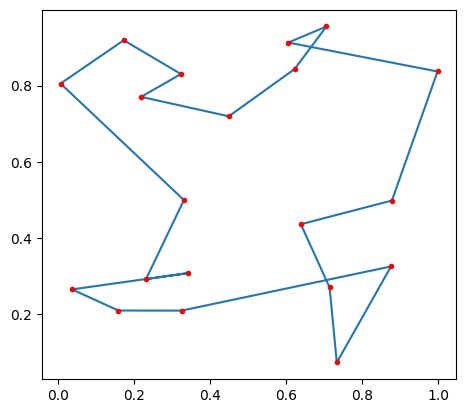

Generation  60  | Best variable =  [13, 8, 19, 16, 9, 6, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 12, 14, 7, 10]  nb Func Eval =  61000
Best cos  =  4.78021185789734
[13, 8, 19, 16, 9, 6, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 12, 14, 7, 10, 13]


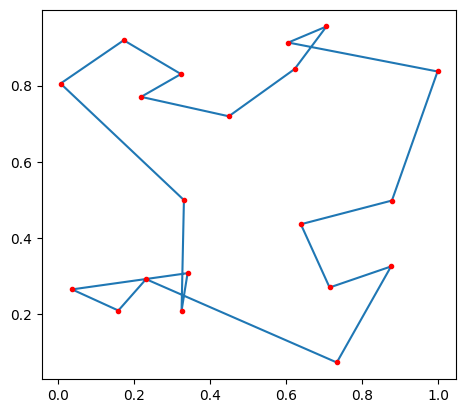

Generation  61  | Best variable =  [13, 8, 19, 16, 9, 6, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 12, 14, 7, 10]  nb Func Eval =  62000
Best cos  =  4.78021185789734
[13, 8, 19, 16, 9, 6, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 12, 14, 7, 10, 13]


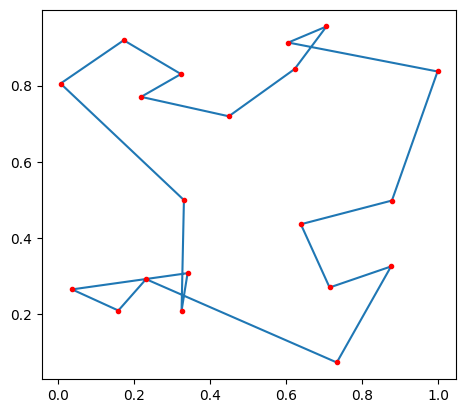

Generation  62  | Best variable =  [13, 8, 19, 16, 9, 6, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 12, 14, 7, 10]  nb Func Eval =  63000
Best cos  =  4.78021185789734
[13, 8, 19, 16, 9, 6, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 12, 14, 7, 10, 13]


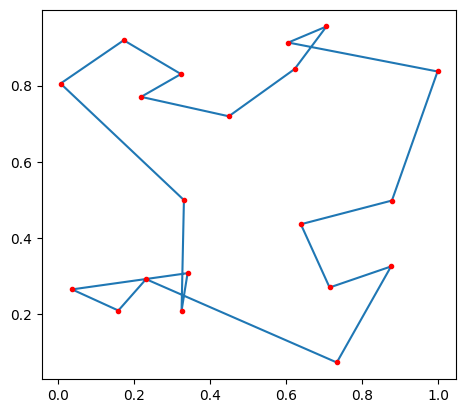

Generation  63  | Best variable =  [13, 8, 19, 16, 9, 6, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 12, 14, 7, 10]  nb Func Eval =  64000
Best cos  =  4.78021185789734
[13, 8, 19, 16, 9, 6, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 12, 14, 7, 10, 13]


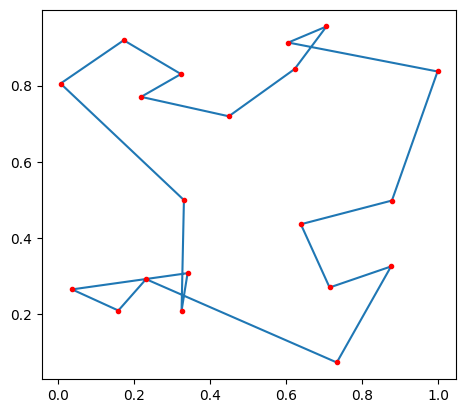

Generation  64  | Best variable =  [13, 8, 19, 16, 9, 6, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 12, 14, 7, 10]  nb Func Eval =  65000
Best cos  =  4.78021185789734
[13, 8, 19, 16, 9, 6, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 12, 14, 7, 10, 13]


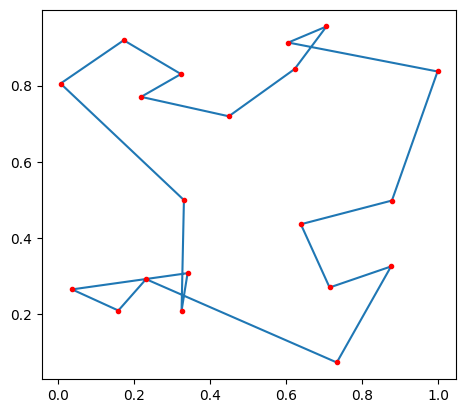

Generation  65  | Best variable =  [13, 8, 19, 16, 9, 6, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 12, 14, 7, 10]  nb Func Eval =  66000
Best cos  =  4.78021185789734
[13, 8, 19, 16, 9, 6, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 12, 14, 7, 10, 13]


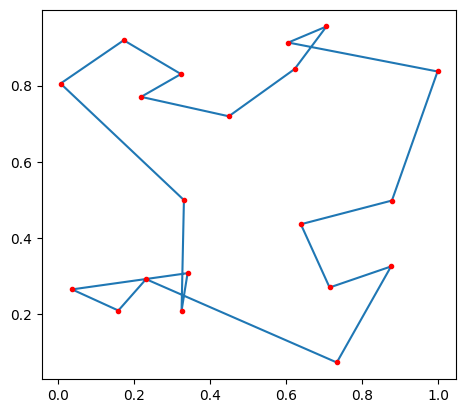

Generation  66  | Best variable =  [13, 8, 19, 16, 9, 6, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 12, 14, 7, 10]  nb Func Eval =  67000
Best cos  =  4.78021185789734
[13, 8, 19, 16, 9, 6, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 12, 14, 7, 10, 13]


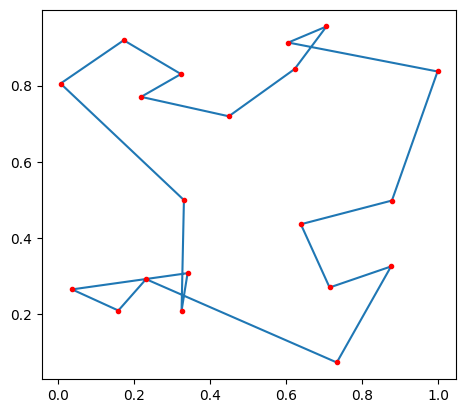

Generation  67  | Best variable =  [13, 8, 19, 16, 9, 6, 1, 5, 17, 0, 2, 4, 3, 15, 11, 18, 12, 14, 7, 10]  nb Func Eval =  68000
Best cos  =  4.692918990027372
[13, 8, 19, 16, 9, 6, 1, 5, 17, 0, 2, 4, 3, 15, 11, 18, 12, 14, 7, 10, 13]


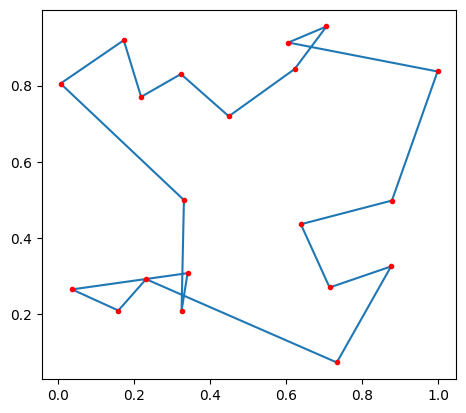

Generation  68  | Best variable =  [6, 8, 9, 16, 13, 19, 1, 5, 0, 17, 2, 3, 4, 15, 11, 18, 7, 10, 14, 12]  nb Func Eval =  69000
Best cos  =  4.663795663400855
[6, 8, 9, 16, 13, 19, 1, 5, 0, 17, 2, 3, 4, 15, 11, 18, 7, 10, 14, 12, 6]


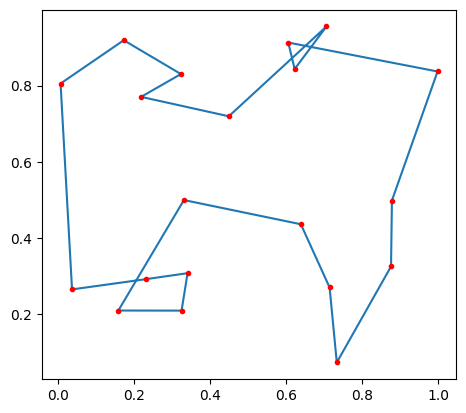

Generation  69  | Best variable =  [6, 16, 9, 8, 19, 13, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 7, 14, 10, 12]  nb Func Eval =  70000
Best cos  =  4.536517884287474
[6, 16, 9, 8, 19, 13, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 7, 14, 10, 12, 6]


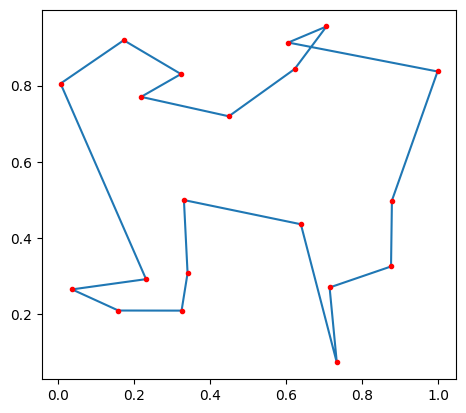

Generation  70  | Best variable =  [6, 16, 9, 8, 19, 13, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 7, 14, 10, 12]  nb Func Eval =  71000
Best cos  =  4.536517884287474
[6, 16, 9, 8, 19, 13, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 7, 14, 10, 12, 6]


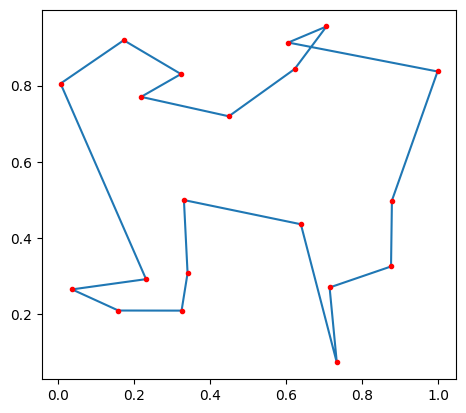

Generation  71  | Best variable =  [6, 16, 9, 8, 19, 13, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 7, 14, 10, 12]  nb Func Eval =  72000
Best cos  =  4.536517884287474
[6, 16, 9, 8, 19, 13, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 7, 14, 10, 12, 6]


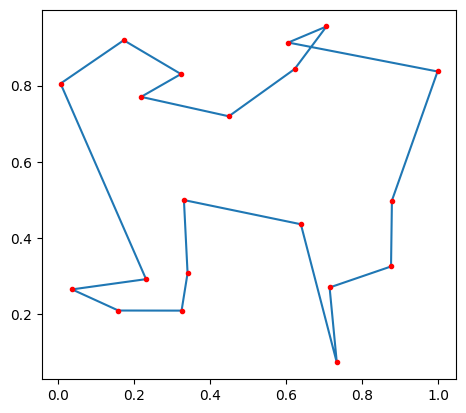

Generation  72  | Best variable =  [6, 16, 9, 8, 19, 13, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 7, 14, 10, 12]  nb Func Eval =  73000
Best cos  =  4.536517884287474
[6, 16, 9, 8, 19, 13, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 7, 14, 10, 12, 6]


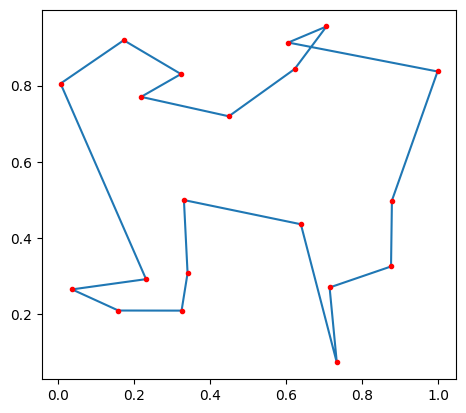

Generation  73  | Best variable =  [6, 16, 9, 8, 19, 13, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 7, 14, 10, 12]  nb Func Eval =  74000
Best cos  =  4.536517884287474
[6, 16, 9, 8, 19, 13, 1, 5, 0, 17, 2, 4, 3, 15, 11, 18, 7, 14, 10, 12, 6]


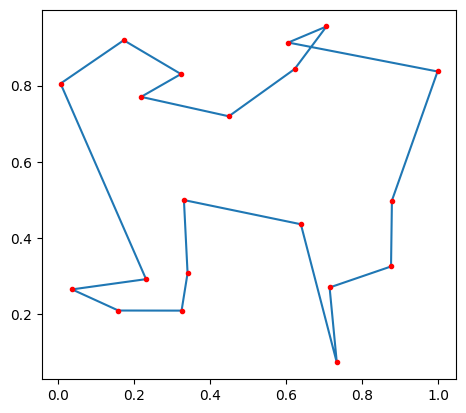

Generation  74  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 3, 4, 15, 11, 18, 14, 10, 7, 12]  nb Func Eval =  75000
Best cos  =  4.51398769781884
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 3, 4, 15, 11, 18, 14, 10, 7, 12, 6]


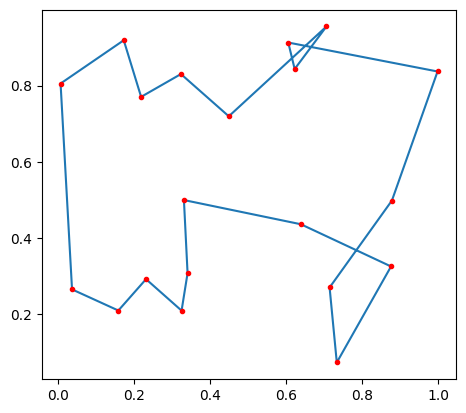

Generation  75  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 3, 4, 15, 11, 18, 14, 10, 7, 12]  nb Func Eval =  76000
Best cos  =  4.51398769781884
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 3, 4, 15, 11, 18, 14, 10, 7, 12, 6]


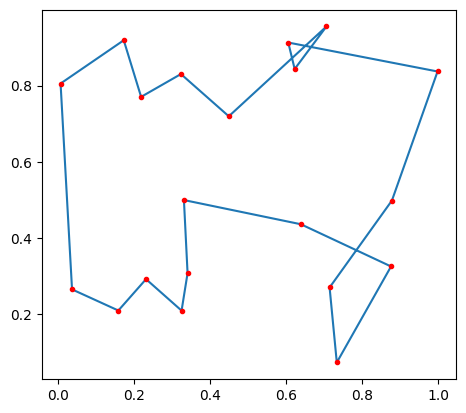

Generation  76  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 3, 4, 15, 11, 18, 14, 10, 7, 12]  nb Func Eval =  77000
Best cos  =  4.51398769781884
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 3, 4, 15, 11, 18, 14, 10, 7, 12, 6]


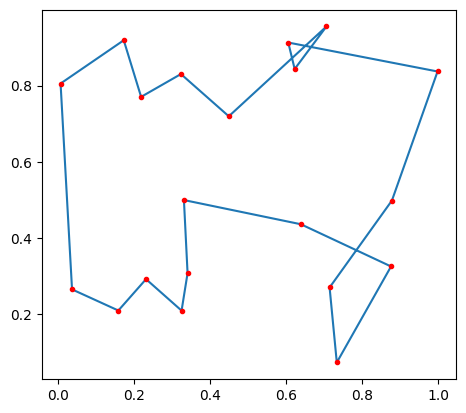

Generation  77  | Best variable =  [6, 16, 9, 8, 13, 19, 1, 5, 17, 0, 2, 3, 4, 15, 11, 18, 7, 10, 14, 12]  nb Func Eval =  78000
Best cos  =  4.430897597618337
[6, 16, 9, 8, 13, 19, 1, 5, 17, 0, 2, 3, 4, 15, 11, 18, 7, 10, 14, 12, 6]


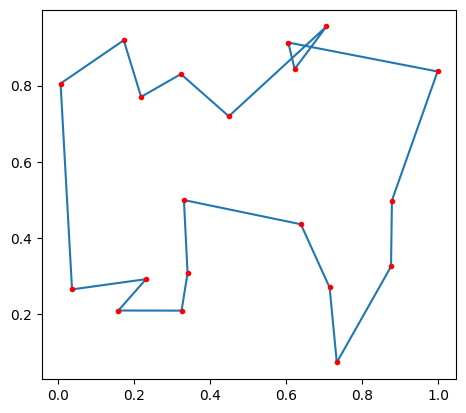

Generation  78  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 3, 15, 11, 18, 14, 10, 7, 12]  nb Func Eval =  79000
Best cos  =  4.415665282265842
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 3, 15, 11, 18, 14, 10, 7, 12, 6]


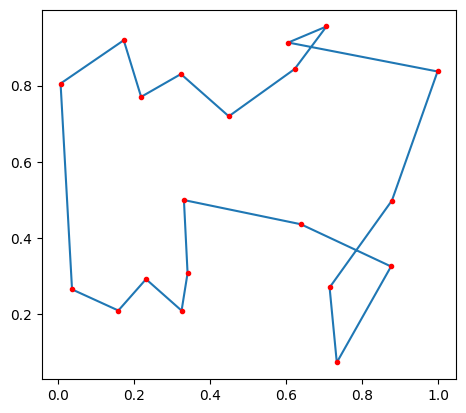

Generation  79  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 3, 15, 11, 18, 7, 14, 10, 12]  nb Func Eval =  80000
Best cos  =  4.302253239852084
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 3, 15, 11, 18, 7, 14, 10, 12, 6]


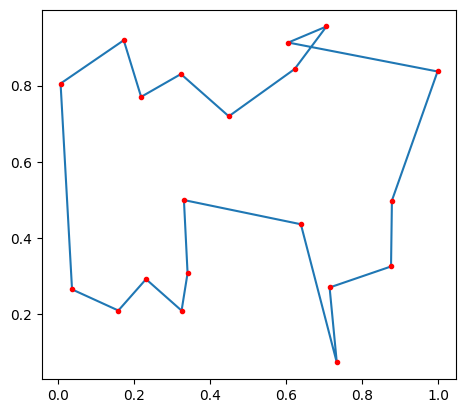

Generation  80  | Best variable =  [6, 9, 16, 13, 8, 19, 1, 5, 17, 0, 2, 15, 4, 3, 11, 18, 7, 10, 14, 12]  nb Func Eval =  81000
Best cos  =  4.226295088251541
[6, 9, 16, 13, 8, 19, 1, 5, 17, 0, 2, 15, 4, 3, 11, 18, 7, 10, 14, 12, 6]


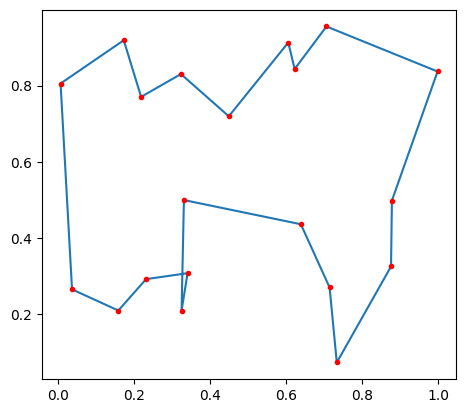

Generation  81  | Best variable =  [6, 9, 16, 13, 8, 19, 1, 5, 17, 0, 2, 15, 4, 3, 11, 18, 7, 10, 14, 12]  nb Func Eval =  82000
Best cos  =  4.226295088251541
[6, 9, 16, 13, 8, 19, 1, 5, 17, 0, 2, 15, 4, 3, 11, 18, 7, 10, 14, 12, 6]


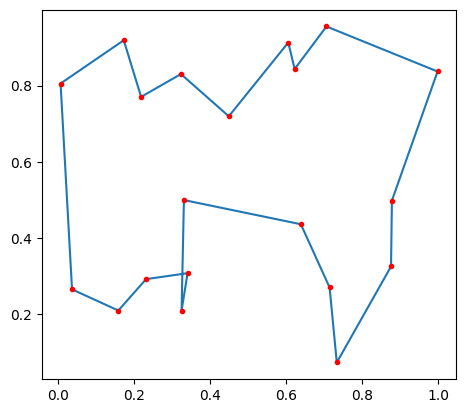

Generation  82  | Best variable =  [6, 9, 16, 13, 8, 19, 1, 5, 17, 0, 2, 15, 4, 3, 11, 18, 7, 10, 14, 12]  nb Func Eval =  83000
Best cos  =  4.226295088251541
[6, 9, 16, 13, 8, 19, 1, 5, 17, 0, 2, 15, 4, 3, 11, 18, 7, 10, 14, 12, 6]


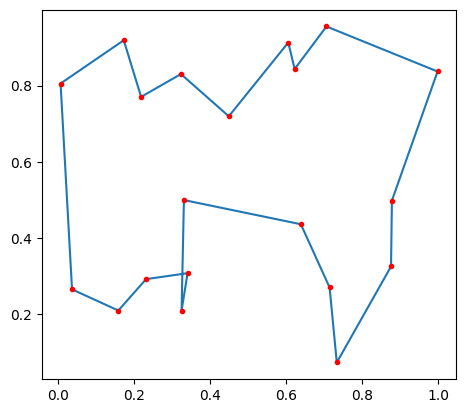

Generation  83  | Best variable =  [6, 9, 16, 13, 8, 19, 1, 5, 17, 0, 2, 15, 4, 3, 11, 18, 7, 10, 14, 12]  nb Func Eval =  84000
Best cos  =  4.226295088251541
[6, 9, 16, 13, 8, 19, 1, 5, 17, 0, 2, 15, 4, 3, 11, 18, 7, 10, 14, 12, 6]


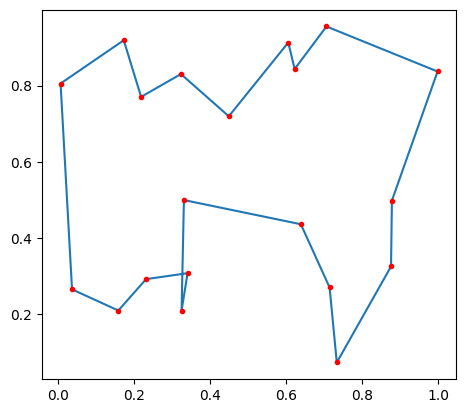

Generation  84  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 14, 10, 12]  nb Func Eval =  85000
Best cos  =  4.149604338076814
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 14, 10, 12, 6]


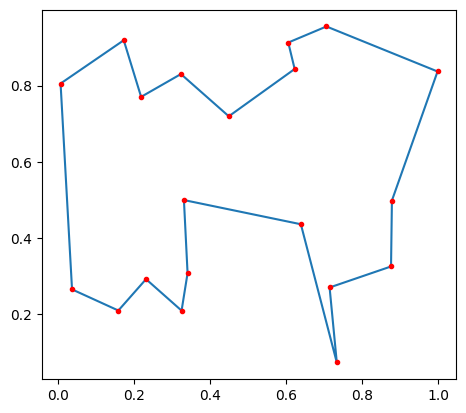

Generation  85  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 14, 10, 12]  nb Func Eval =  86000
Best cos  =  4.149604338076814
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 14, 10, 12, 6]


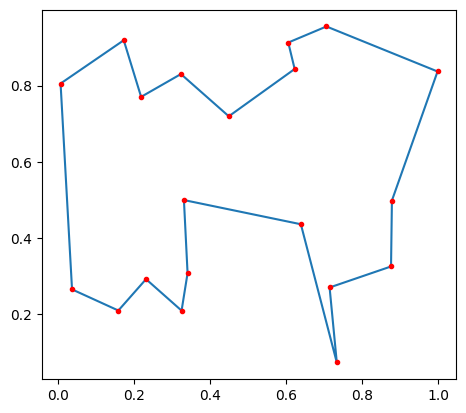

Generation  86  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 14, 10, 12]  nb Func Eval =  87000
Best cos  =  4.149604338076814
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 14, 10, 12, 6]


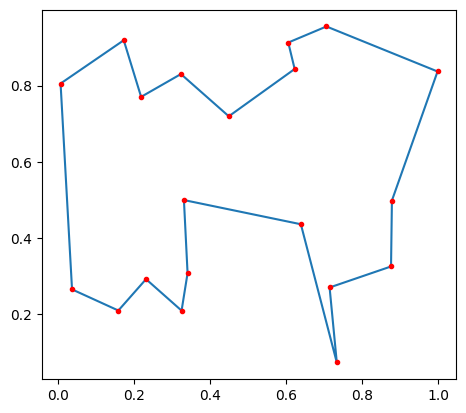

Generation  87  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 14, 10, 12]  nb Func Eval =  88000
Best cos  =  4.149604338076814
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 14, 10, 12, 6]


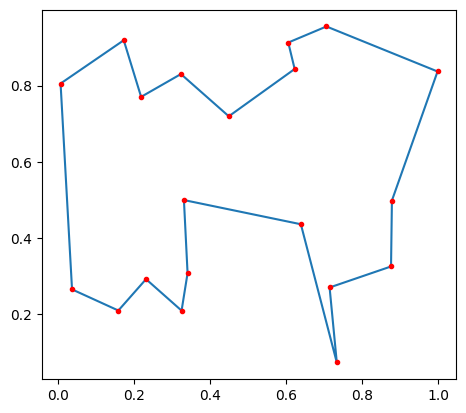

Generation  88  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 14, 10, 12]  nb Func Eval =  89000
Best cos  =  4.149604338076814
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 14, 10, 12, 6]


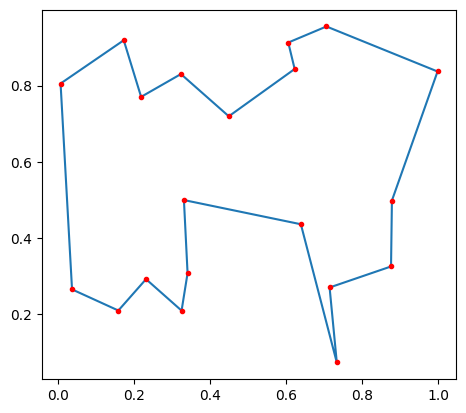

Generation  89  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 14, 10, 12]  nb Func Eval =  90000
Best cos  =  4.149604338076814
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 14, 10, 12, 6]


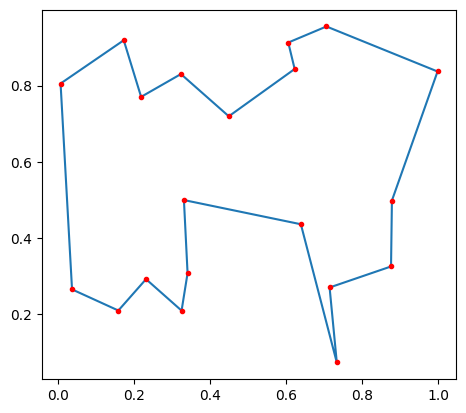

Generation  90  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 14, 10, 12]  nb Func Eval =  91000
Best cos  =  4.149604338076814
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 14, 10, 12, 6]


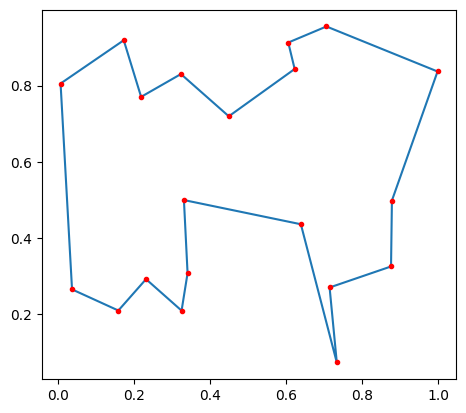

Generation  91  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 15, 4, 3, 11, 18, 7, 10, 14, 12]  nb Func Eval =  92000
Best cos  =  4.142505275671822
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 15, 4, 3, 11, 18, 7, 10, 14, 12, 6]


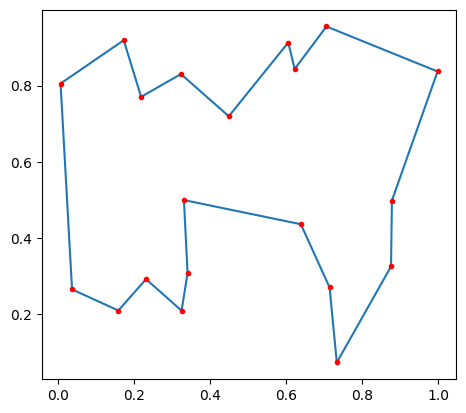

Generation  92  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 10, 14, 12]  nb Func Eval =  93000
Best cos  =  4.075918464437949
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 10, 14, 12, 6]


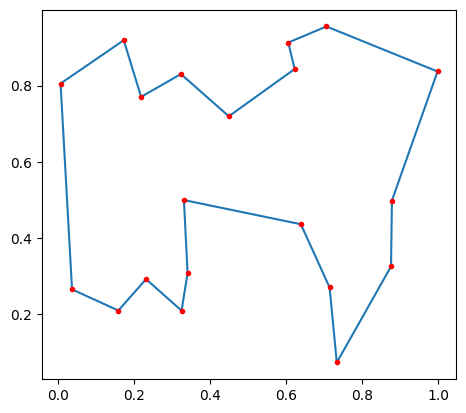

Generation  93  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 10, 14, 12]  nb Func Eval =  94000
Best cos  =  4.075918464437949
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 10, 14, 12, 6]


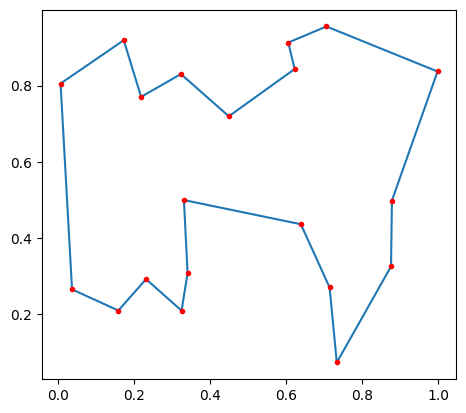

Generation  94  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 10, 14, 12]  nb Func Eval =  95000
Best cos  =  4.075918464437949
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 10, 14, 12, 6]


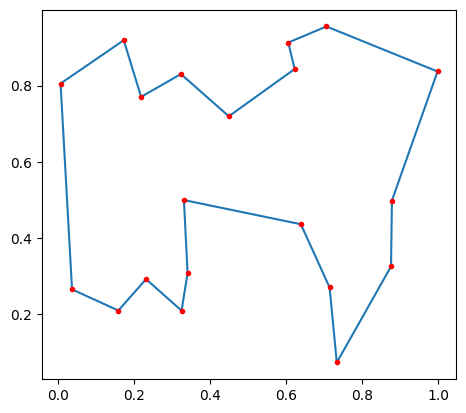

Generation  95  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 10, 14, 12]  nb Func Eval =  96000
Best cos  =  4.075918464437949
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 10, 14, 12, 6]


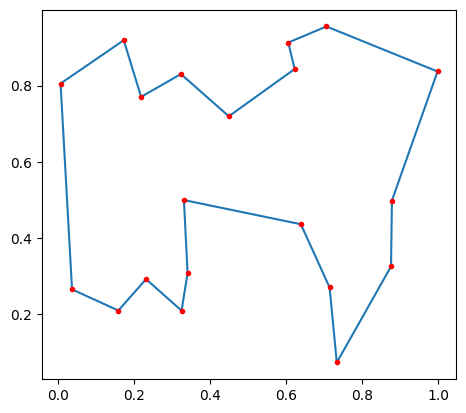

Generation  96  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 10, 14, 12]  nb Func Eval =  97000
Best cos  =  4.075918464437949
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 10, 14, 12, 6]


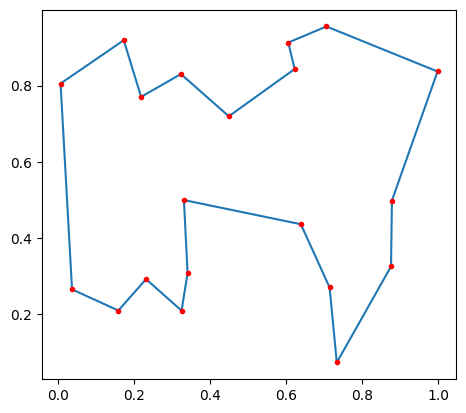

Generation  97  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 10, 14, 12]  nb Func Eval =  98000
Best cos  =  4.075918464437949
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 10, 14, 12, 6]


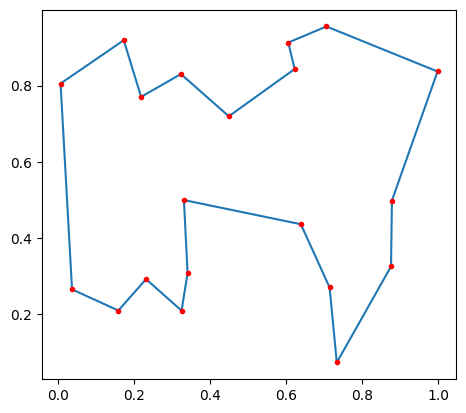

Generation  98  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 10, 14, 12]  nb Func Eval =  99000
Best cos  =  4.075918464437949
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 10, 14, 12, 6]


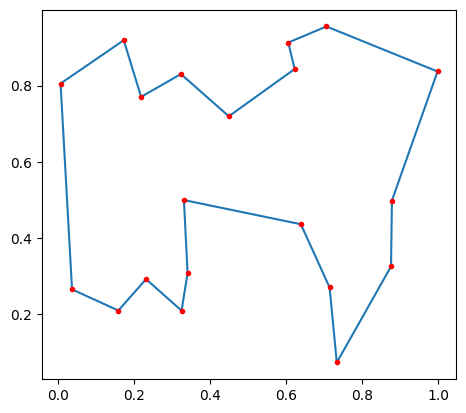

Generation  99  | Best variable =  [6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 10, 14, 12]  nb Func Eval =  100000
Best cos  =  4.075918464437949
[6, 16, 9, 13, 8, 19, 1, 5, 17, 0, 2, 4, 15, 3, 11, 18, 7, 10, 14, 12, 6]


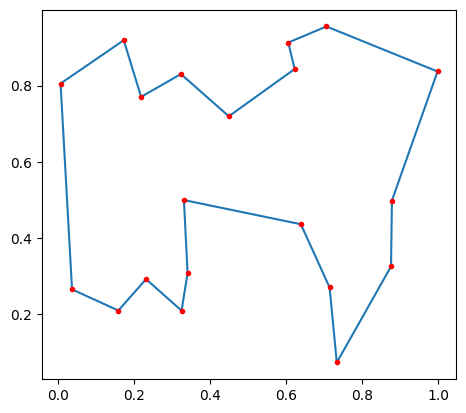

In [9]:
# def function(a,b,c,d=1):

def genetic_algorithm(pop_size, generations, A,start=None):
    N = len(A)
    print(N)
    if start!=None:
        population = start.copy()
    else:
        population = initialize_population(pop_size, N) # initializare random intre marginile date

    keep_best = math.floor(keep_frac*pop_size)  # proportia de indivizi care raman pentru generatia viitoare
    print(keep_best)

    nfeval = 0                                  # counter pentru nr de evaluari ale functiei

    
    
    # plotting the first frame
    
    for gen in range(generations):
        # evaluate objective function
        # ori evaluare directa in numpy
        # ori facem un loop peste fiecare individ din populatie
        vals = func(population)

        #plt.clear()

        nfeval+=len(population)

        # np.argsort sorteaza array-ul si returneaza indicii care efectueaza sortarea
        # Partea de Selectie
        ind = np.argsort(vals)
        
        bestpop = []
        for i in range(keep_best):
            bestpop.append(population[ind[i]])   # cei mai buni x% indivizi
        
        # Construim populatia de la generatia urmatoare! 
        nextpop = bestpop
        


        # Crossover+Mutatii
        while len(nextpop)<pop_size:
            # alegem doua elemente random in populatia initiala
            #ii = np.random.randint(len(population), size=2)
            
            # folosim doar bestpop
            ii = np.random.randint(len(bestpop), size=2)


            # Operator Crossover
            #c1,c2 = crossover(population[ii[0]],population[ii[1]])

            #print("c1=",bestpop[ii[0]])
            #print("c2=",bestpop[ii[1]])

            c1,c2 = crossover(bestpop[ii[0]],bestpop[ii[1]])

            #print("c1=",c1)
            #print("c2=",c2)
            
            # Operator Mutatie
            c1 = mutate(c1,mutation_rate=0.5)
            c2 = mutate(c2,mutation_rate=0.5)

            #print("c1=",c1)
            #print("c2=",c2)

            if c1 not in nextpop:
                nextpop.append(c1)
            
            if len(nextpop)==pop_size:
                break

            if c2 not in nextpop:
                nextpop.append(c2)
            if len(nextpop)==pop_size:
                break

        print("Generation ",gen," | Best variable = ",bestpop[0]," nb Func Eval = ",nfeval)
        print("Best cos  = ",vals[ind[0]])

        cycle = bestpop[0].copy()
        #cycle.append(bestpop[0][0])
        cycle.append(cycle[0])
        print(cycle)
        plt.figure()
        plt.plot(x[cycle],y[cycle])
        plt.plot(x,y,".r")
        plt.axis("scaled")
        plt.show()

        population = nextpop
            
    return population
# nr de evaluari ale functiei obiectiv este
# nr de indivizi * nr de generatii
pop = genetic_algorithm(1000,100,A)

20
50
Generation  0  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  1000
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


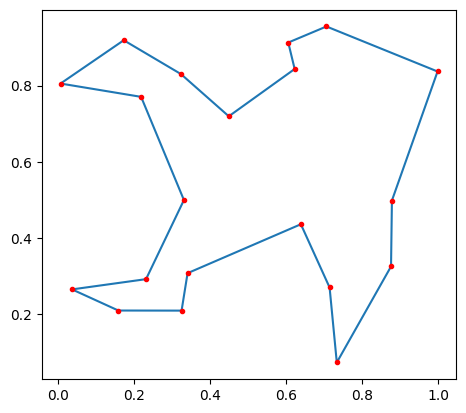

Generation  1  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  1100
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


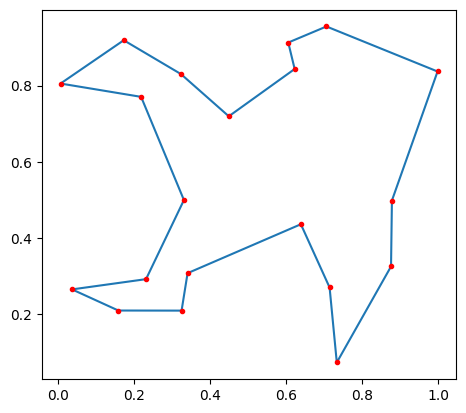

Generation  2  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  1200
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


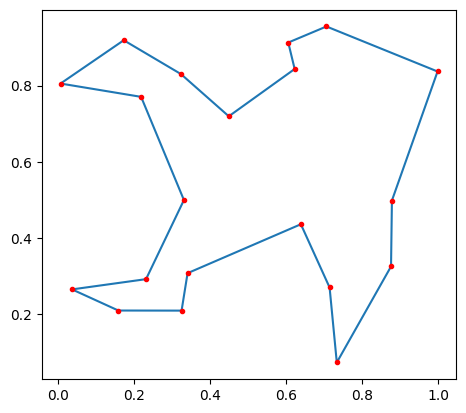

Generation  3  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  1300
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


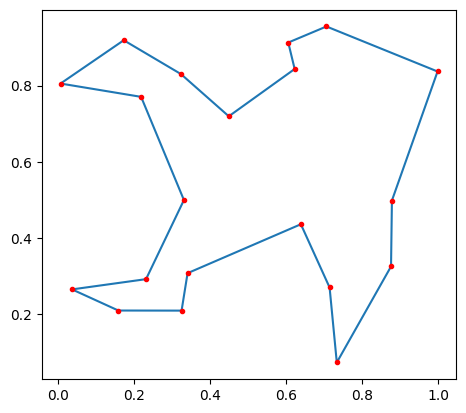

Generation  4  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  1400
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


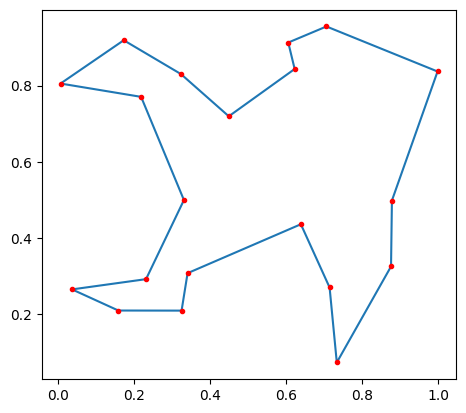

Generation  5  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  1500
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


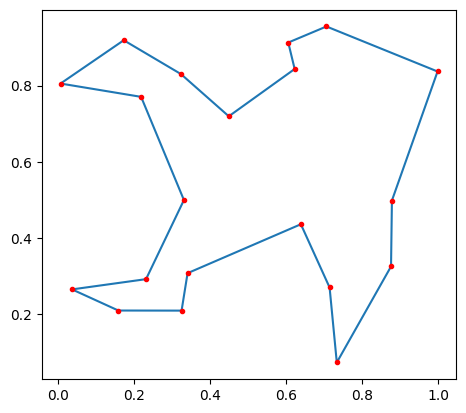

Generation  6  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  1600
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


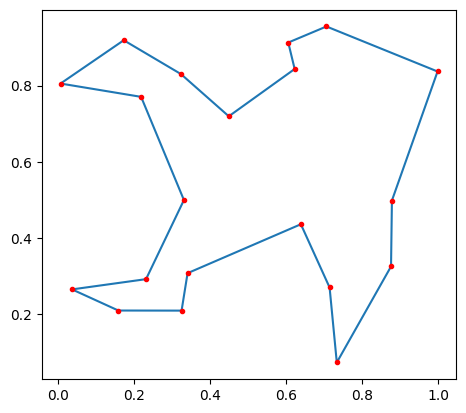

Generation  7  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  1700
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


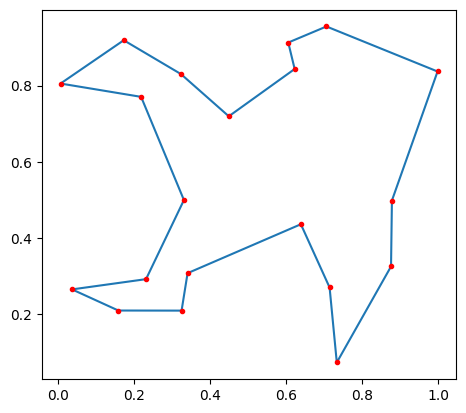

Generation  8  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  1800
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


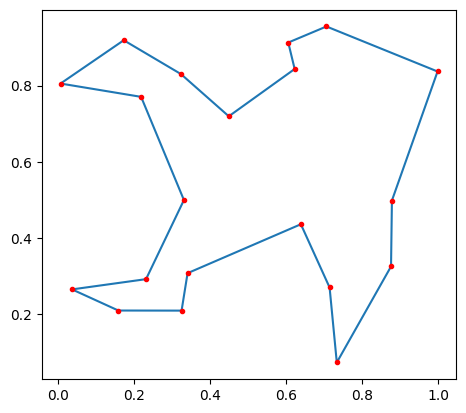

Generation  9  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  1900
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


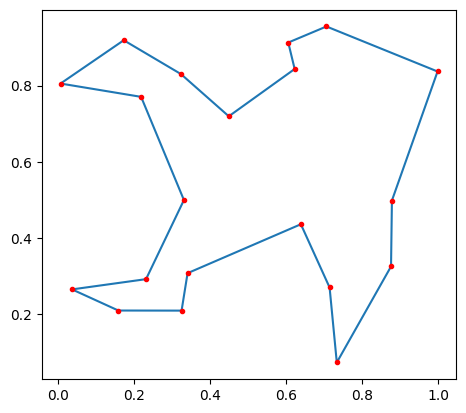

Generation  10  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  2000
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


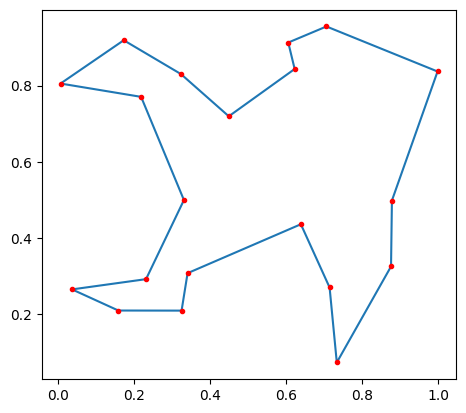

Generation  11  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  2100
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


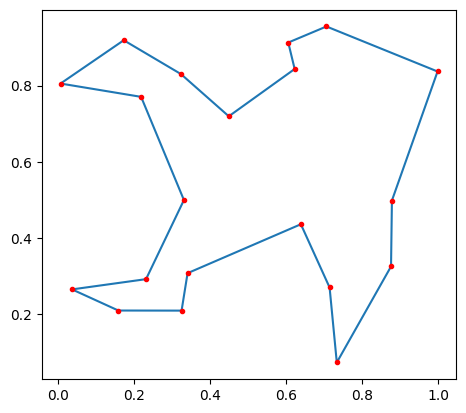

Generation  12  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  2200
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


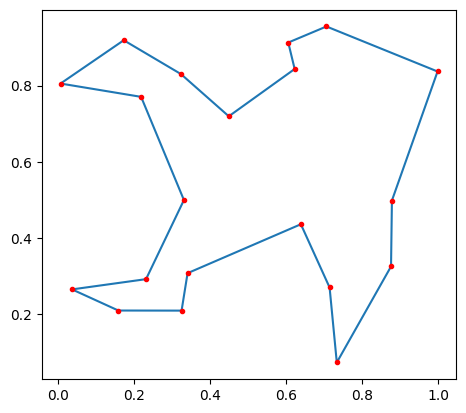

Generation  13  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  2300
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


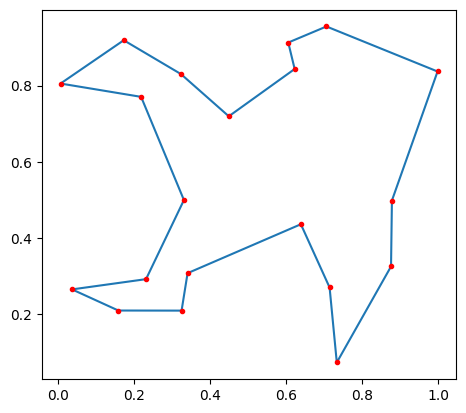

Generation  14  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  2400
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


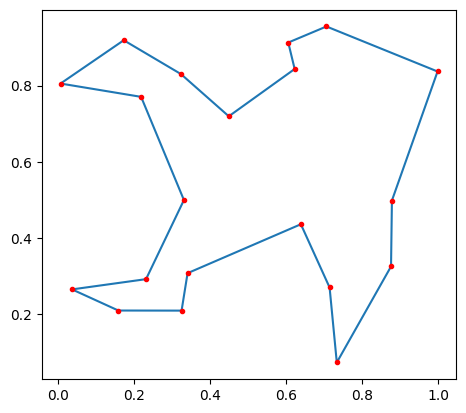

Generation  15  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  2500
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


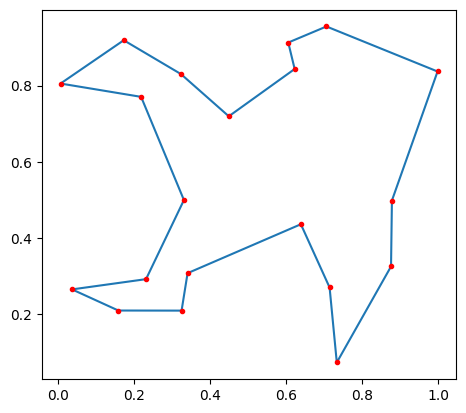

Generation  16  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  2600
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


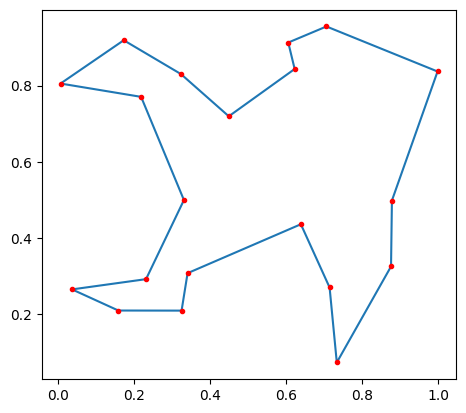

Generation  17  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  2700
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


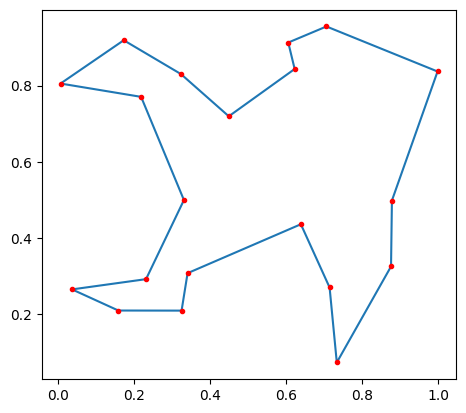

Generation  18  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  2800
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


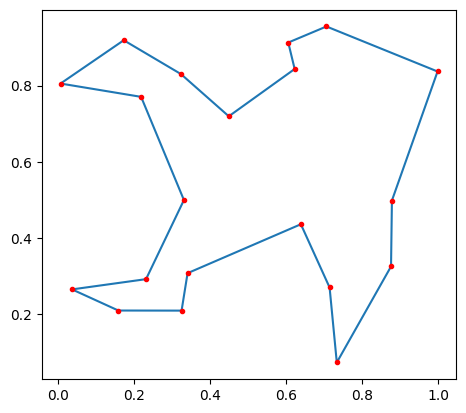

Generation  19  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  2900
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


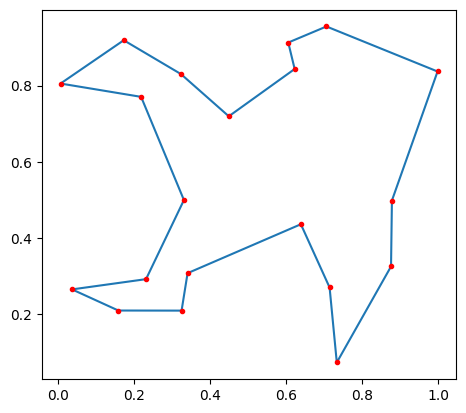

Generation  20  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  3000
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


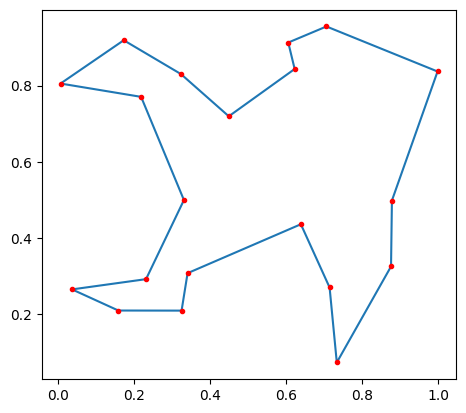

Generation  21  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  3100
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


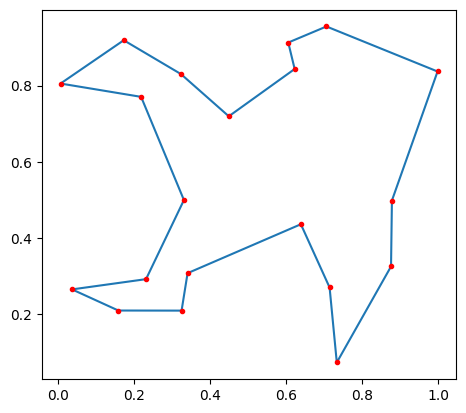

Generation  22  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  3200
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


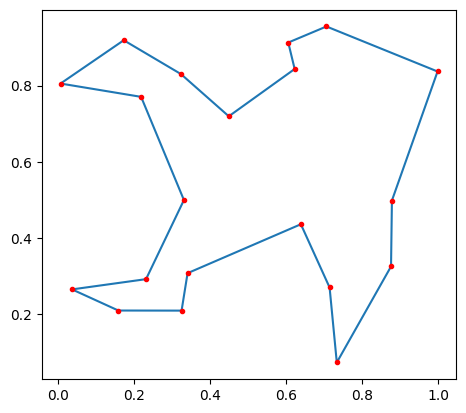

Generation  23  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  3300
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


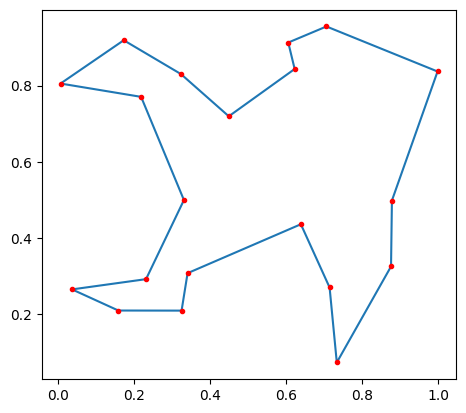

Generation  24  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  3400
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


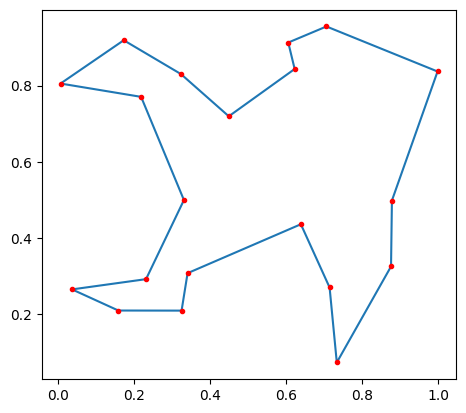

Generation  25  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  3500
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


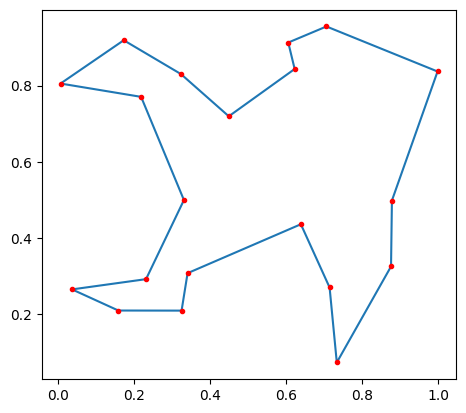

Generation  26  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  3600
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


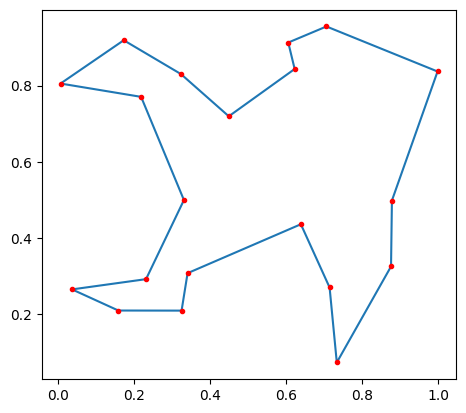

Generation  27  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  3700
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


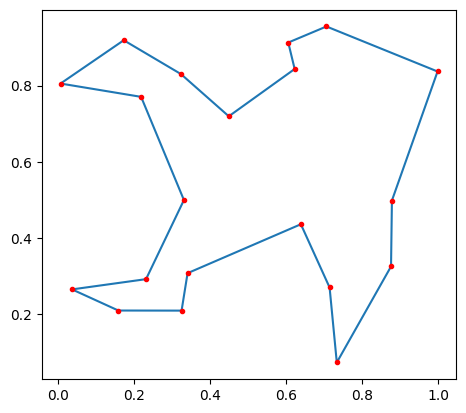

Generation  28  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  3800
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


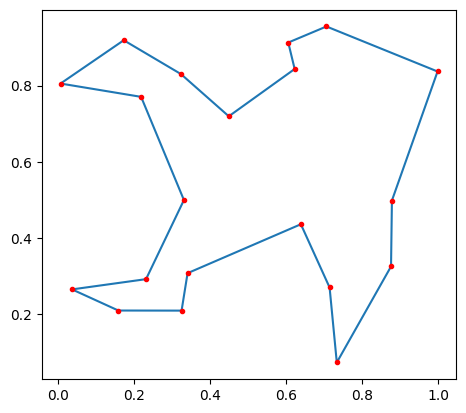

Generation  29  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  3900
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


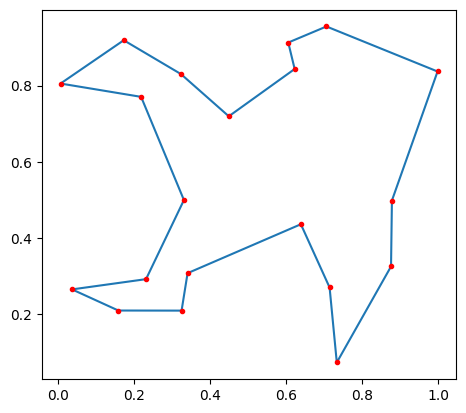

Generation  30  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  4000
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


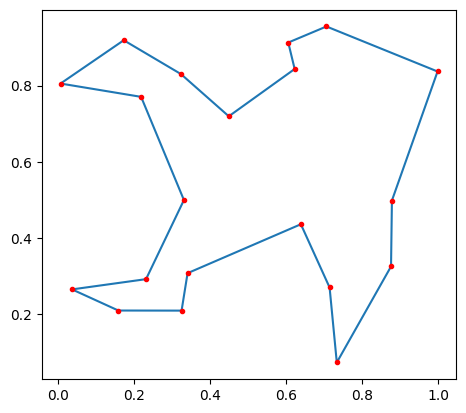

Generation  31  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  4100
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


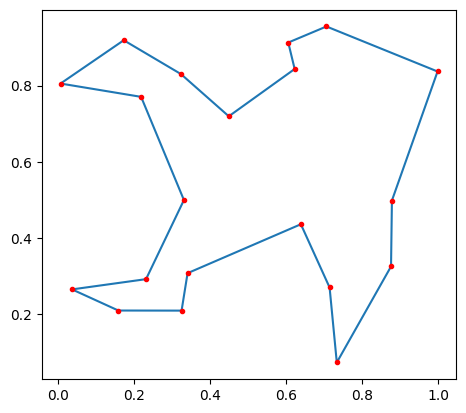

Generation  32  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  4200
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


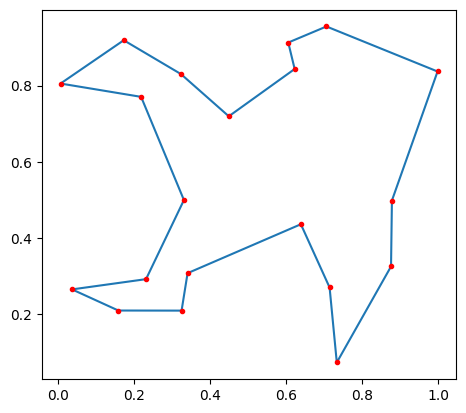

Generation  33  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  4300
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


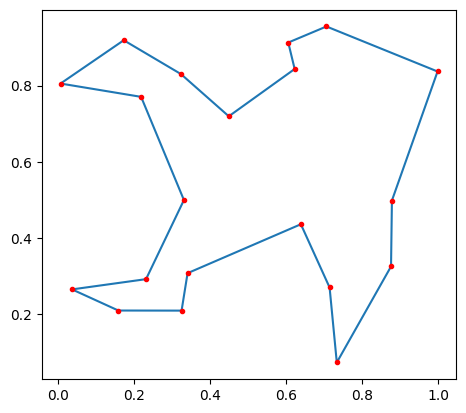

Generation  34  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  4400
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


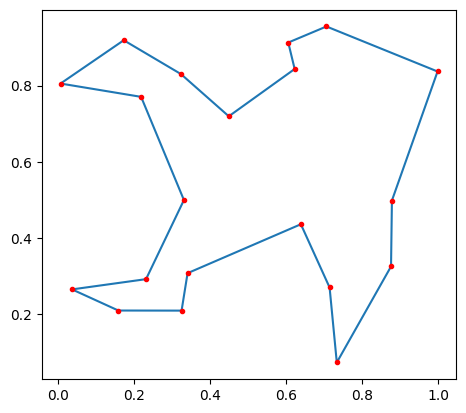

Generation  35  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  4500
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


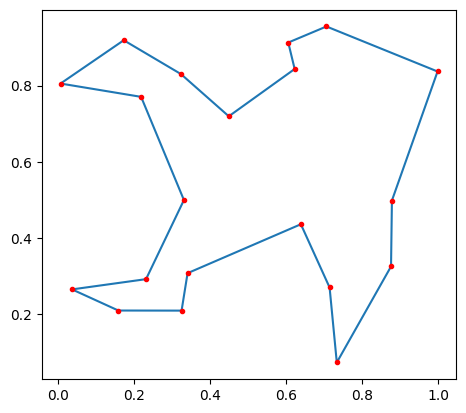

Generation  36  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  4600
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


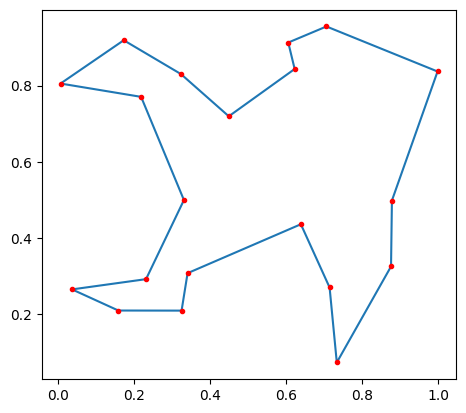

Generation  37  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  4700
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


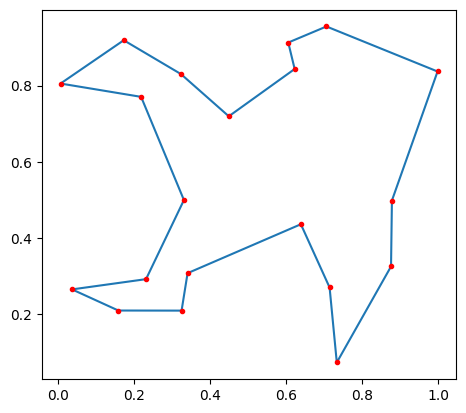

Generation  38  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  4800
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


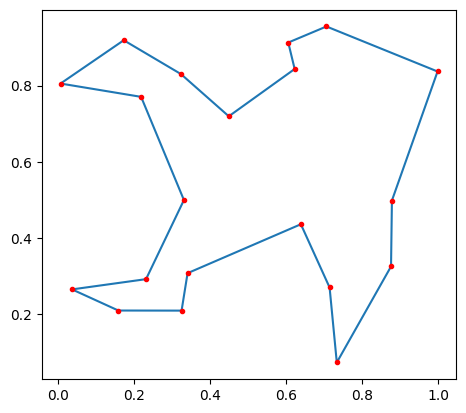

Generation  39  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  4900
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


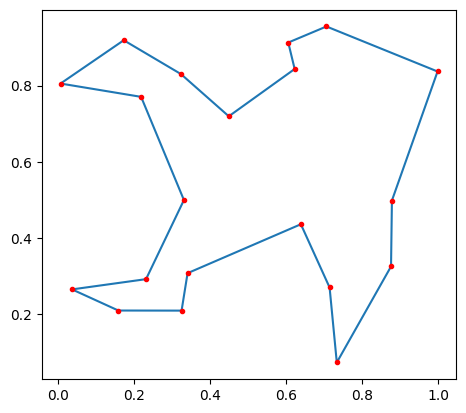

Generation  40  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  5000
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


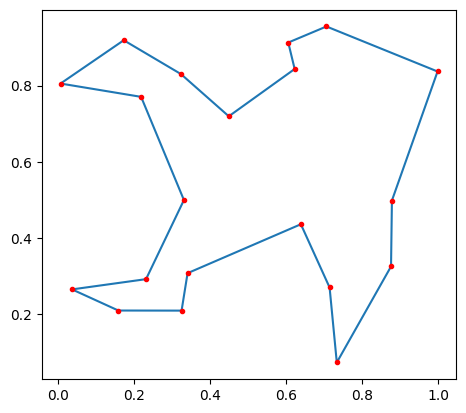

Generation  41  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  5100
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


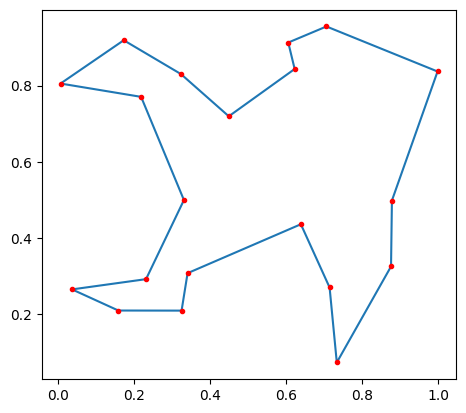

Generation  42  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  5200
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


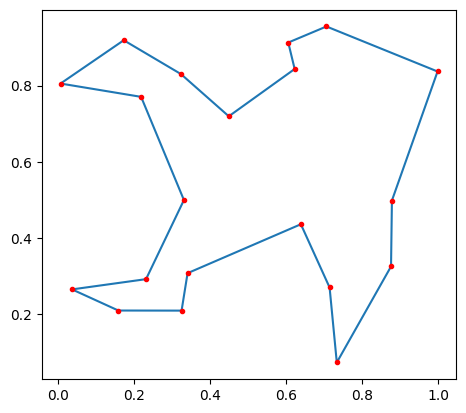

Generation  43  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  5300
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


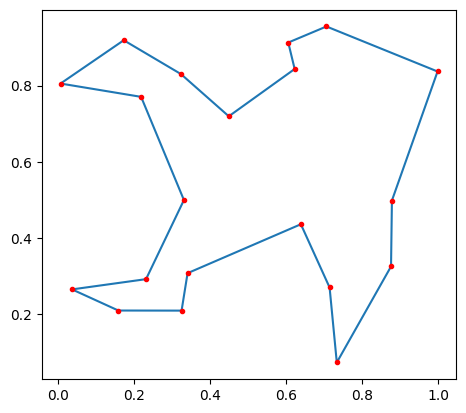

Generation  44  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  5400
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


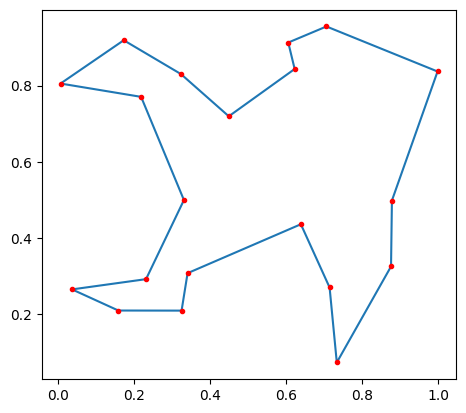

Generation  45  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  5500
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


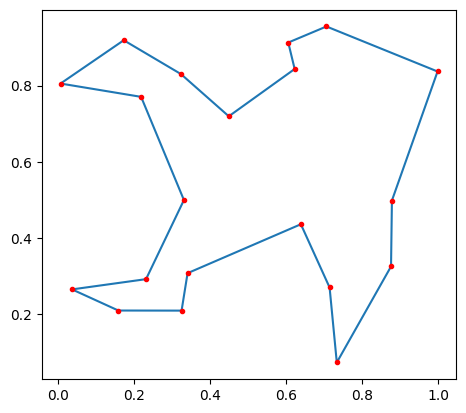

Generation  46  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  5600
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


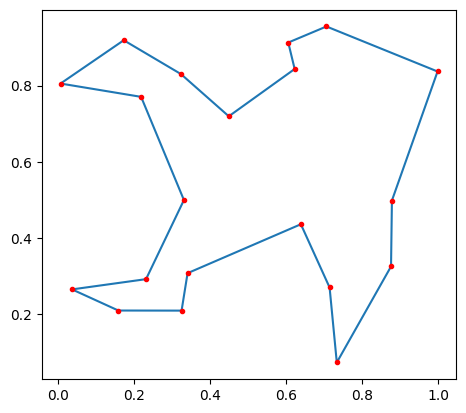

Generation  47  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  5700
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


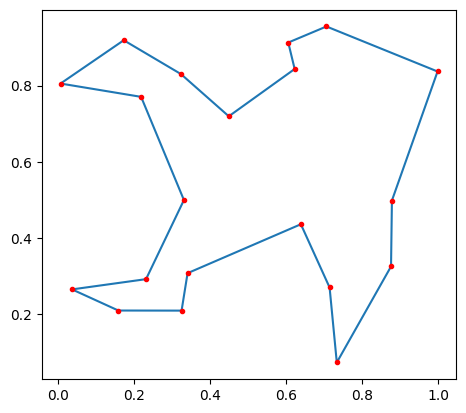

Generation  48  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  5800
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


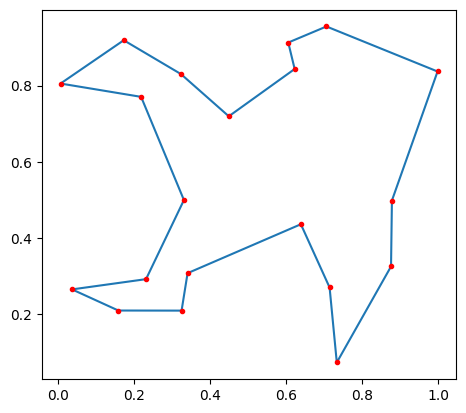

Generation  49  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  5900
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


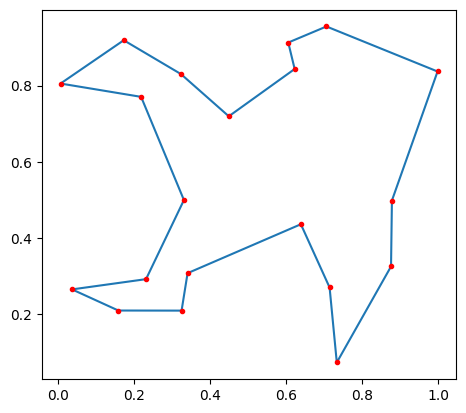

Generation  50  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  6000
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


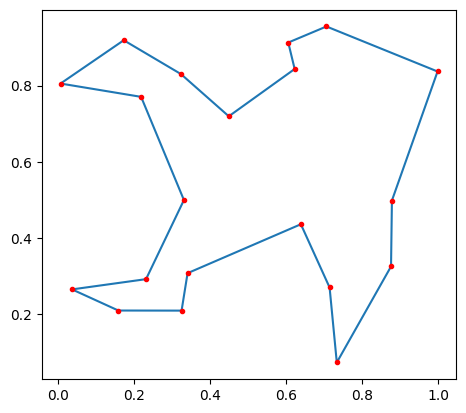

Generation  51  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  6100
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


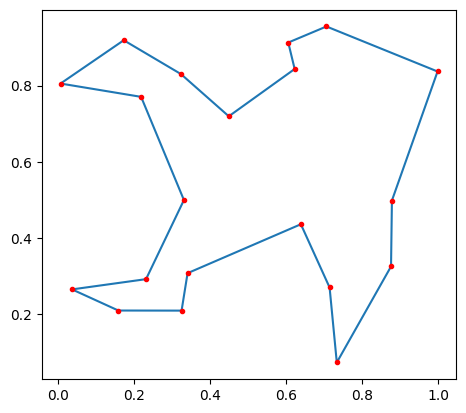

Generation  52  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  6200
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


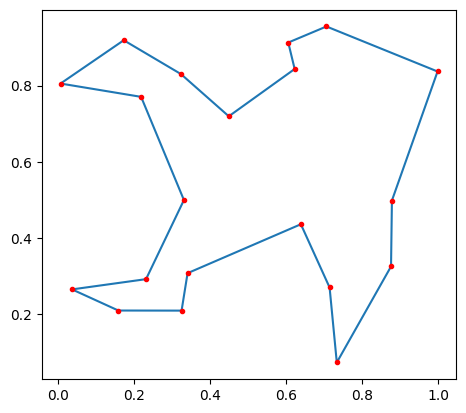

Generation  53  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  6300
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


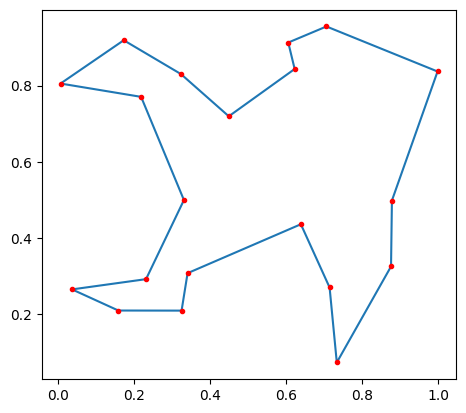

Generation  54  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  6400
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


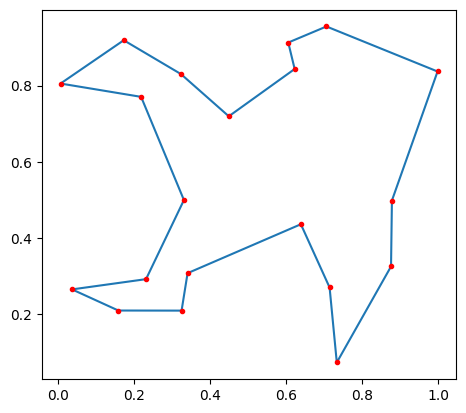

Generation  55  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  6500
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


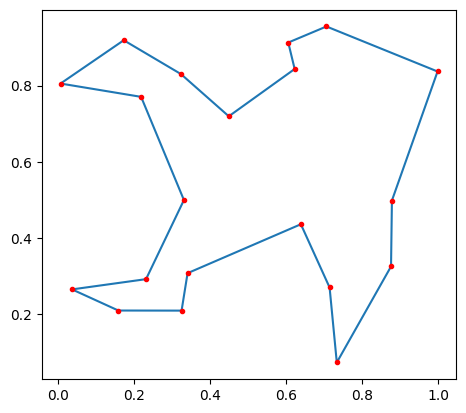

Generation  56  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  6600
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


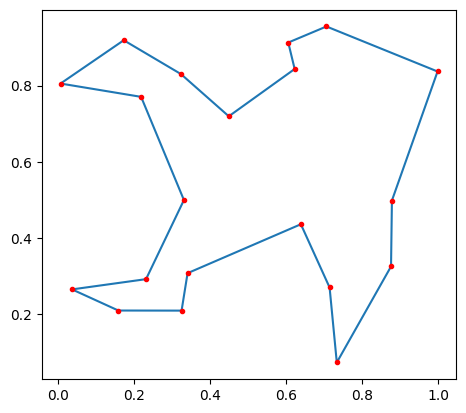

Generation  57  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  6700
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


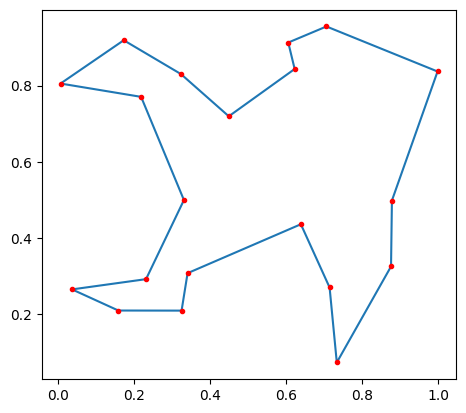

Generation  58  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  6800
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


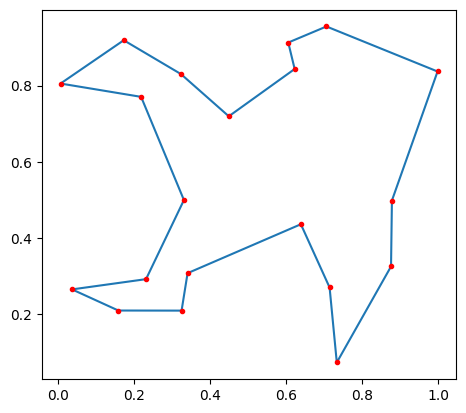

Generation  59  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  6900
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


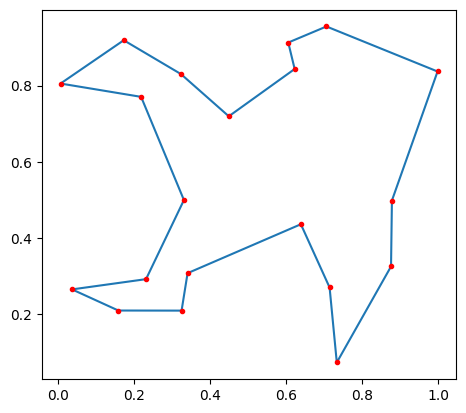

Generation  60  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  7000
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


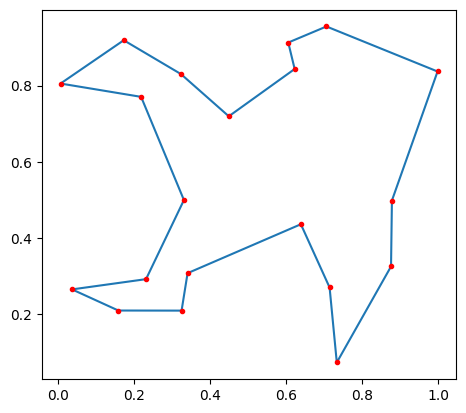

Generation  61  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  7100
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


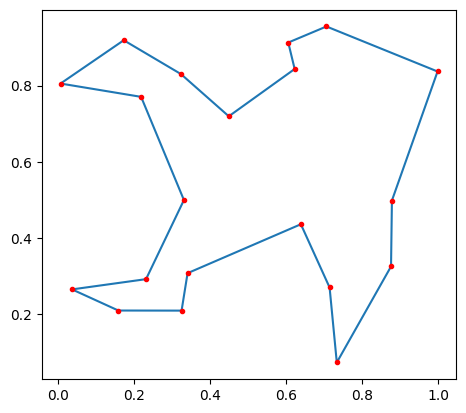

Generation  62  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  7200
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


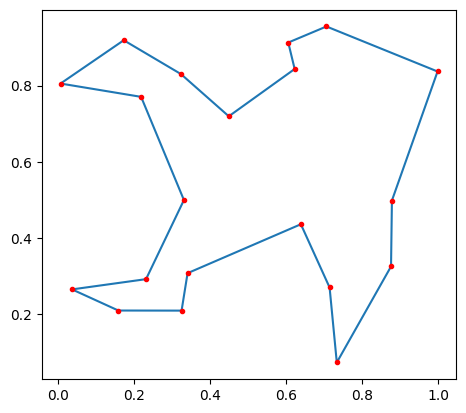

Generation  63  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  7300
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


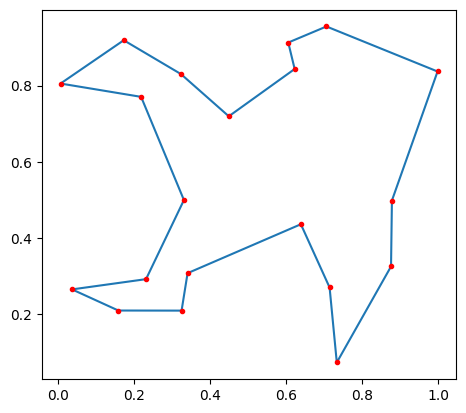

Generation  64  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  7400
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


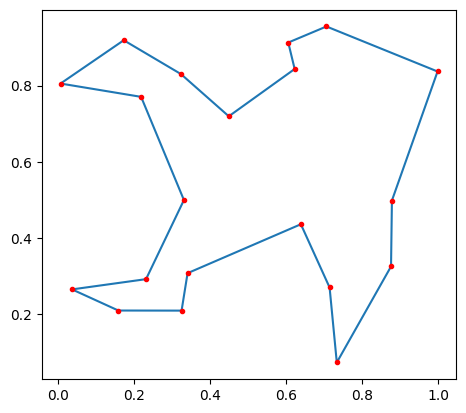

Generation  65  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  7500
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


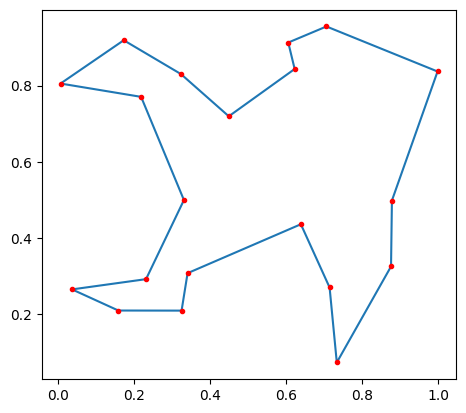

Generation  66  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  7600
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


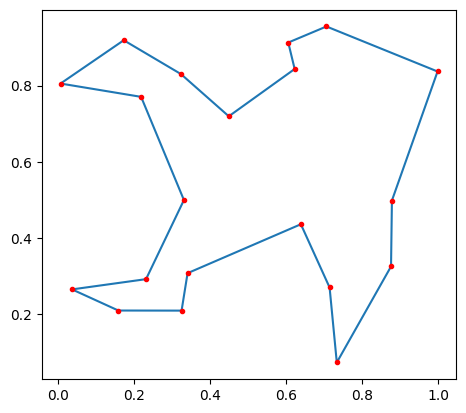

Generation  67  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  7700
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


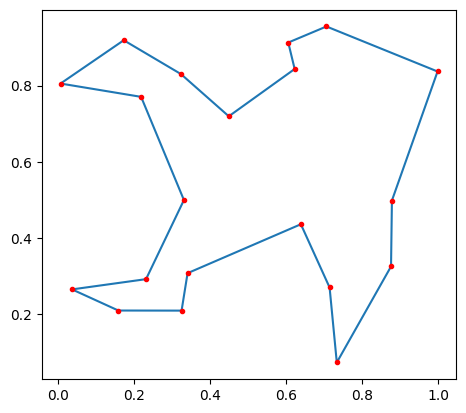

Generation  68  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  7800
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


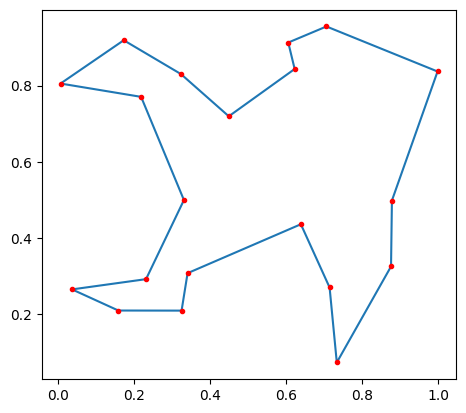

Generation  69  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  7900
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


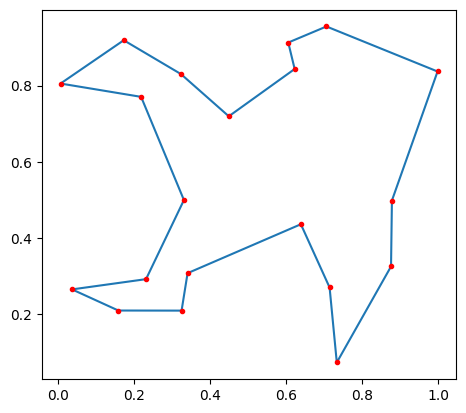

Generation  70  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  8000
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


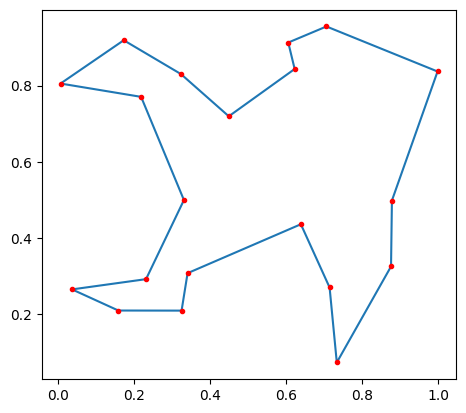

Generation  71  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  8100
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


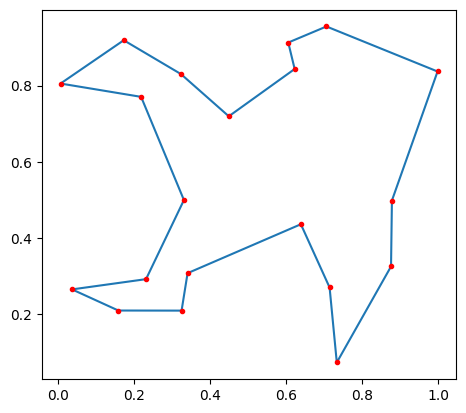

Generation  72  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  8200
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


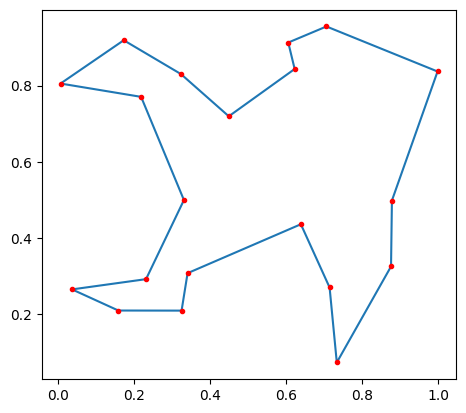

Generation  73  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  8300
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]


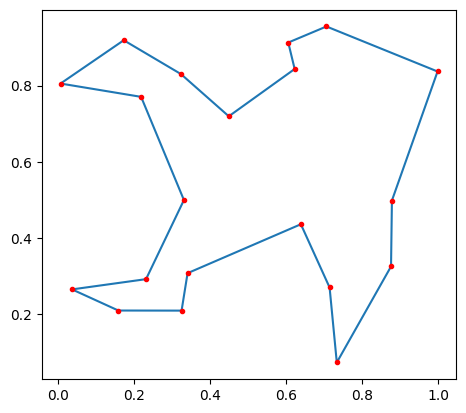

Generation  74  | Best variable =  [8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19]  nb Func Eval =  8400
Best cos  =  4.116957524761531
[8, 9, 16, 12, 14, 10, 7, 18, 11, 3, 15, 4, 2, 0, 5, 1, 17, 6, 13, 19, 8]



KeyboardInterrupt



In [8]:
pop2 = genetic_algorithm(100,100,A,pop)